In [1]:
# Install necessary packages (only if not already installed)
!pip install tensorflow pandas numpy matplotlib openpyxl


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [60]:
df1 = pd.read_excel('DS1.xlsx')
df2 = pd.read_excel('DS2.xlsx')
df3 = pd.read_excel('DS3.xlsx')
df4 = pd.read_excel('DS4.xlsx')

In [4]:
#ds1 info,describe and shape

print(df1.info())
print(df1.describe())
print(df1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yyyy                  44 non-null     int64  
 1   Sea of Okhotsk        44 non-null     float64
 2   Bering Sea            44 non-null     float64
 3   Hudson Bay            44 non-null     float64
 4   Baffin Bay            44 non-null     float64
 5   Greenland Sea         44 non-null     float64
 6   Barent Sea            44 non-null     float64
 7   Kara Sea              44 non-null     float64
 8   Laptev Sea            44 non-null     float64
 9   East Siberian Sea     44 non-null     float64
 10  Chukchi Sea           44 non-null     float64
 11  Beaufort Sea          44 non-null     float64
 12  Canadian Archipelago  44 non-null     float64
 13   Central Arctic       44 non-null     float64
 14  All Regions           44 non-null     float64
dtypes: float64(14), int64(1)


In [5]:
#ds2 info,describe and shape
print(df2.info())
print(df2.describe())
print(df2.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yyyy                  44 non-null     int64  
 1   Sea of Okhotsk        44 non-null     float64
 2   Bering Sea            44 non-null     float64
 3   Hudson Bay            44 non-null     float64
 4   Baffin Bay            44 non-null     float64
 5   Greenland Sea         44 non-null     float64
 6   Barents Sea           44 non-null     float64
 7   Kara Sea              44 non-null     float64
 8   Laptev Sea            44 non-null     float64
 9   East Siberian Sea     44 non-null     float64
 10  Chukchi Sea           44 non-null     float64
 11  Beaufort Sea          44 non-null     float64
 12  Canadian Archipelago  44 non-null     float64
 13  Central Arctic        44 non-null     float64
 14  All Regions           44 non-null     float64
dtypes: float64(14), int64(1)


In [6]:
#ds3 info,describe and shape
print(df3.info())
print(df3.describe())
print(df3.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yyyy                  44 non-null     int64  
 1   Sea of Okhotsk        44 non-null     float64
 2   Bering Sea            44 non-null     float64
 3   Hudson Bay            44 non-null     float64
 4   Baffin Bay            44 non-null     float64
 5   Greenland Sea         44 non-null     float64
 6   Barents Sea           44 non-null     float64
 7   Kara Sea              44 non-null     float64
 8   Laptev Sea            44 non-null     float64
 9   East Siberian Sea     44 non-null     float64
 10  Chukchi Sea           44 non-null     float64
 11  Beaufort Sea          44 non-null     float64
 12  Canadian Archipelago  44 non-null     float64
 13  Central Arctic        44 non-null     float64
 14  All Regions           44 non-null     float64
dtypes: float64(14), int64(1)


In [7]:
#ds4 info,describe and shape
print(df4.info())
print(df4.describe())
print(df4.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yyyy                  44 non-null     int64  
 1   Sea of Oktosk         44 non-null     float64
 2   Bering Sea            44 non-null     float64
 3   Hudson Bay            44 non-null     float64
 4   Baffin Bay            44 non-null     float64
 5   Greenland Sea         44 non-null     float64
 6   Barent Sea            44 non-null     float64
 7   Kara Sea              44 non-null     float64
 8   Laptev Sea            44 non-null     float64
 9   East Siberian Sea     44 non-null     float64
 10  Chukchi Sea           44 non-null     float64
 11  Beaufort Sea          44 non-null     float64
 12  Canadian Archipelago  44 non-null     float64
 13  Central Arctic        44 non-null     float64
 14  All Regions           44 non-null     float64
dtypes: float64(14), int64(1)


# TIME SERIES ANALYSIS

In [8]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

for column in df1.columns[1:]:
    fig.add_trace(go.Scatter(x=df1['yyyy'], y=df1[column], mode='lines', name=f'{column}'))

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Early Melt Onset",
    title="Early Melt Onset Over Time by Region",
    width=1000

)

fig.show()

In [9]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

for column in df2.columns[1:]:
    fig.add_trace(go.Scatter(x=df2['yyyy'], y=df2[column], mode='lines', name=f'{column}'))

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Melt Onset (Day of Year)",
    title="Melt Onset Over Time by Region",
    width=1000

)

fig.show()

In [10]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

for column in df3.columns[1:]:
    fig.add_trace(go.Scatter(x=df3['yyyy'], y=df3[column], mode='lines', name=f'{column}'))

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Early Freeze",
    title="Early Freeze over time by region",
    width=1000

)

fig.show()

In [11]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

for column in df4.columns[1:]:
    fig.add_trace(go.Scatter(x=df4['yyyy'], y=df4[column], mode='lines', name=f'{column}'))

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Freeze Onset (Day of Year)",
    title="Freeze Onset Over Time by Region",
    width=1000

)

fig.show()

In [12]:
#Yearly Melt Onset Change: Calculate the difference between melt onset days year over year for each region to understand the rate of change (average/mean difference)
df_diff1 = df1.diff().mean()
df_diff1

yyyy                    1.000000
Sea of Okhotsk         -0.620930
Bering Sea              0.434628
Hudson Bay              0.143791
Baffin Bay             -0.171907
Greenland Sea          -0.725093
Barent Sea             -1.255860
Kara Sea               -0.486558
Laptev Sea             -0.145186
East Siberian Sea      -0.156465
Chukchi Sea             0.029698
Beaufort Sea            0.038000
Canadian Archipelago   -0.187953
 Central Arctic        -0.225698
All Regions            -0.130628
dtype: float64

In [13]:
#Yearly Melt Onset Change: Calculate the difference between melt onset days year over year for each region to understand the rate of change (average/mean difference)
df_diff2 = df2.diff().mean()
df_diff2

yyyy                    1.000000
Sea of Okhotsk         -0.678558
Bering Sea              0.255140
Hudson Bay              0.074140
Baffin Bay             -0.106023
Greenland Sea          -0.593465
Barents Sea            -0.962837
Kara Sea               -0.443721
Laptev Sea             -0.150209
East Siberian Sea       0.092791
Chukchi Sea            -0.028465
Beaufort Sea            0.071977
Canadian Archipelago   -0.221488
Central Arctic          0.052419
All Regions            -0.039349
dtype: float64

In [14]:
#Yearly Melt Onset Change: Calculate the difference between melt onset days year over year for each region to understand the rate of change (average/mean difference)
df_diff3 = df3.diff().mean()
df_diff3

yyyy                    1.000000
Sea of Okhotsk          0.725907
Bering Sea              0.884279
Hudson Bay              0.529814
Baffin Bay              0.396302
Greenland Sea           0.858674
Barents Sea             0.585744
Kara Sea                0.827186
Laptev Sea              0.651488
East Siberian Sea       0.883070
Chukchi Sea             0.856000
Beaufort Sea            0.387349
Canadian Archipelago    0.599279
Central Arctic          0.103116
All Regions             0.514372
dtype: float64

In [15]:
#Yearly Melt Onset Change: Calculate the difference between melt onset days year over year for each region to understand the rate of change (average/mean difference)
df_diff4 = df4.diff().mean()
df_diff4

yyyy                    1.000000
Sea of Oktosk           0.518581
Bering Sea              0.644000
Hudson Bay              0.386814
Baffin Bay              0.326558
Greenland Sea           0.758767
Barent Sea              0.510581
Kara Sea                0.791814
Laptev Sea              0.448767
East Siberian Sea       0.845372
Chukchi Sea             0.783628
Beaufort Sea            0.570953
Canadian Archipelago    0.652581
Central Arctic          0.071953
All Regions             0.469209
dtype: float64

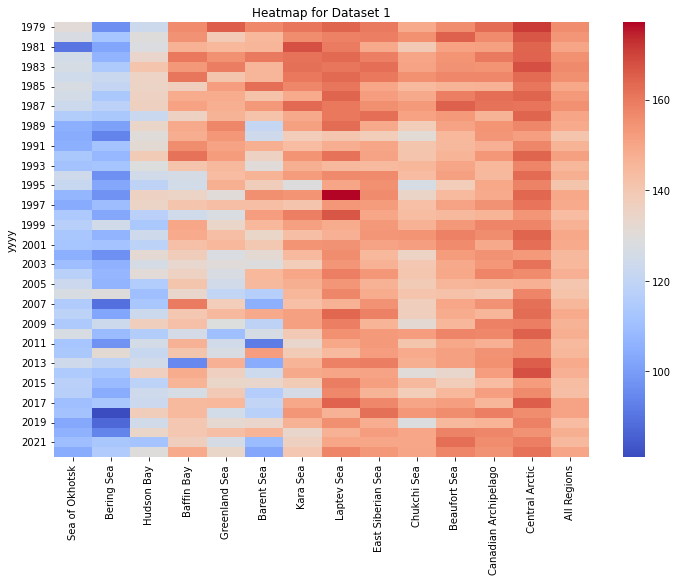

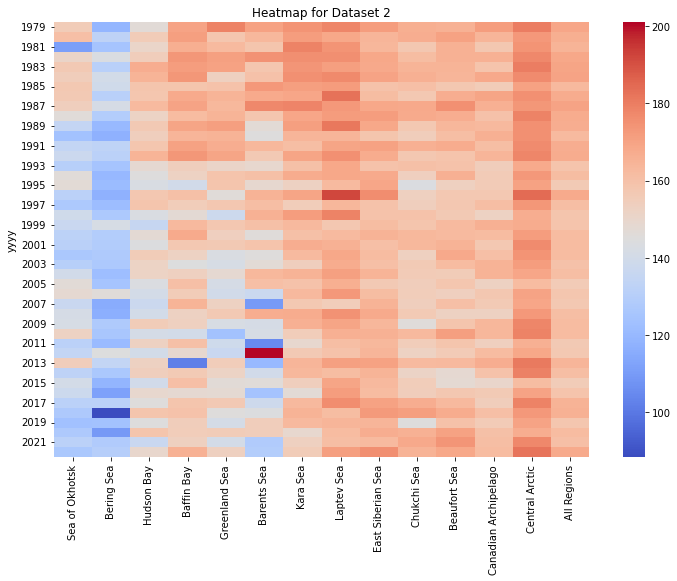

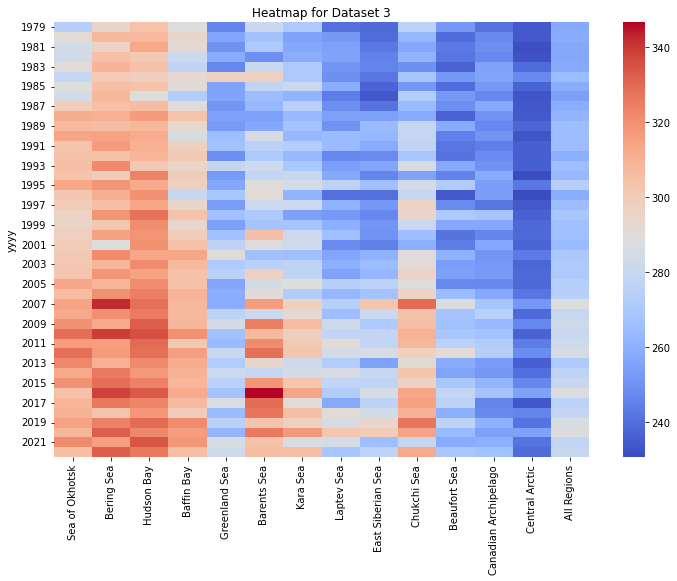

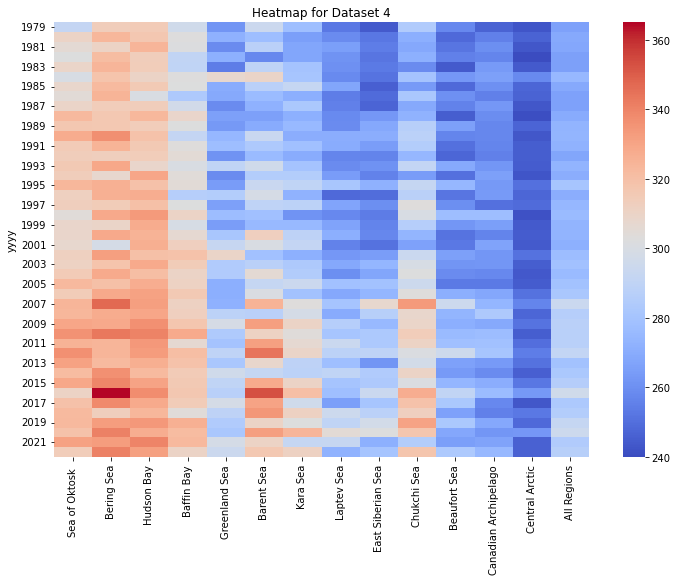

In [16]:
#heatmap for all the four datasets
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Heatmap for Dataset 1 (ds1)
plt.figure(figsize=(12, 8))
sns.heatmap(df1.set_index('yyyy'), cmap='coolwarm', annot=False)
plt.title('Heatmap for Dataset 1')
plt.show()

# 2. Heatmap for Dataset 2 (ds2)
plt.figure(figsize=(12, 8))
sns.heatmap(df2.set_index('yyyy'), cmap='coolwarm', annot=False)
plt.title('Heatmap for Dataset 2')
plt.show()

# 3. Heatmap for Dataset 3 (ds3)
plt.figure(figsize=(12, 8))
sns.heatmap(df3.set_index('yyyy'), cmap='coolwarm', annot=False)
plt.title('Heatmap for Dataset 3')
plt.show()

# 4. Heatmap for Dataset 4 (ds4)
plt.figure(figsize=(12, 8))
sns.heatmap(df4.set_index('yyyy'), cmap='coolwarm', annot=False)
plt.title('Heatmap for Dataset 4')
plt.show()


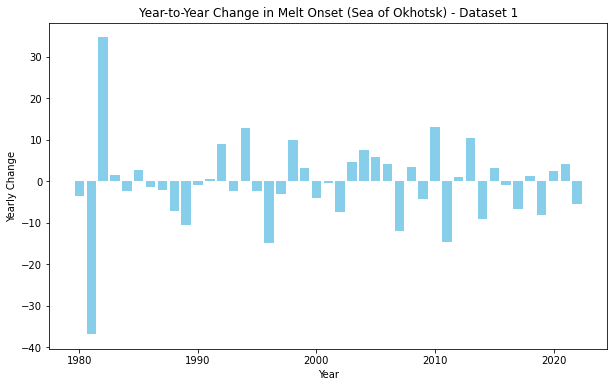

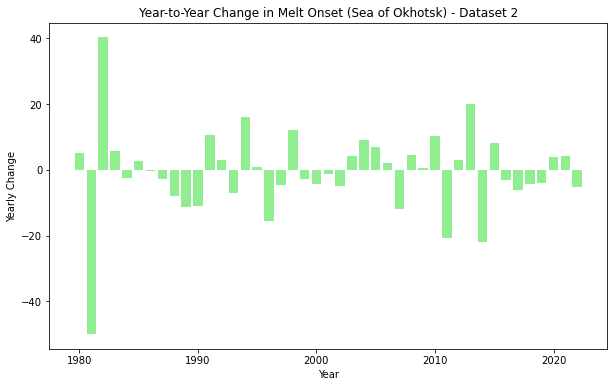

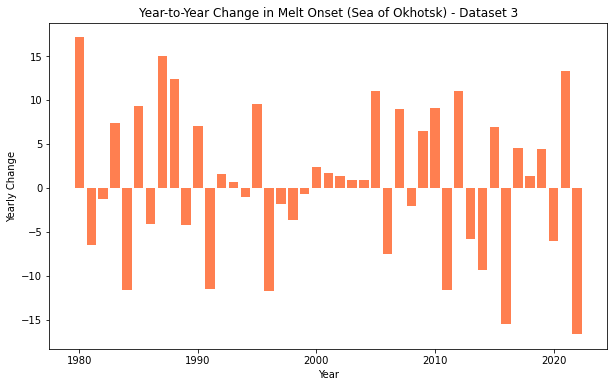

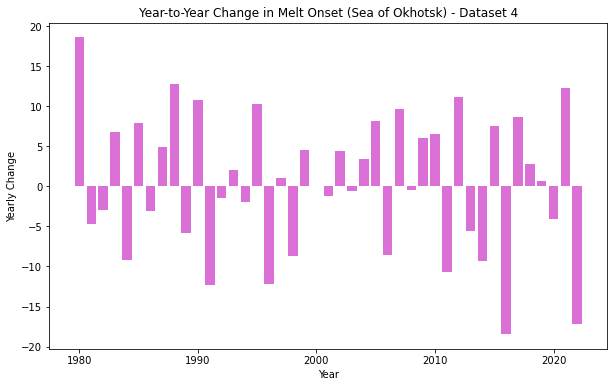

In [17]:
import matplotlib.pyplot as plt

# 1. Dataset 1: Calculate yearly change for a specific region
df1['Yearly Change'] = df1[df1.columns[1]].diff()  # Assuming column 1 is the region you want to analyze

# Bar plot for yearly changes in Dataset 1
plt.figure(figsize=(10, 6))
plt.bar(df1['yyyy'], df1['Yearly Change'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Yearly Change')
plt.title('Year-to-Year Change in Melt Onset (Sea of Okhotsk) - Dataset 1')
plt.show()

# 2. Dataset 2: Calculate yearly change for a specific region
df2['Yearly Change'] = df2[df2.columns[1]].diff()

# Bar plot for yearly changes in Dataset 2
plt.figure(figsize=(10, 6))
plt.bar(df2['yyyy'], df2['Yearly Change'], color='lightgreen')
plt.xlabel('Year')
plt.ylabel('Yearly Change')
plt.title('Year-to-Year Change in Melt Onset (Sea of Okhotsk) - Dataset 2')
plt.show()

# 3. Dataset 3: Calculate yearly change for a specific region
df3['Yearly Change'] = df3[df3.columns[1]].diff()

# Bar plot for yearly changes in Dataset 3
plt.figure(figsize=(10, 6))
plt.bar(df3['yyyy'], df3['Yearly Change'], color='coral')
plt.xlabel('Year')
plt.ylabel('Yearly Change')
plt.title('Year-to-Year Change in Melt Onset (Sea of Okhotsk) - Dataset 3')
plt.show()

# 4. Dataset 4: Calculate yearly change for a specific region
df4['Yearly Change'] = df4[df4.columns[1]].diff()

# Bar plot for yearly changes in Dataset 4
plt.figure(figsize=(10, 6))
plt.bar(df4['yyyy'], df4['Yearly Change'], color='orchid')
plt.xlabel('Year')
plt.ylabel('Yearly Change')
plt.title('Year-to-Year Change in Melt Onset (Sea of Okhotsk) - Dataset 4')
plt.show()


In [18]:
# 1. Load the datasets
ds1 = pd.read_excel('DS1.xlsx')
ds2 = pd.read_excel('DS2.xlsx')
ds3 = pd.read_excel('DS3.xlsx')
ds4 = pd.read_excel('DS4.xlsx')


In [19]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\Users\janis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\janis\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.1227 - val_loss: 0.0884
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 0.0880 - val_loss: 0.0622
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 0.0672 - val_loss: 0.0401
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 0.0415 - val_loss: 0.0217
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - loss: 0.0202 - val_loss: 0.0080
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 0.0079 - val_loss: 7.2192e-04
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 0.0034 - val_loss: 0.0020
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 0.0053 - val_loss: 0.0087
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 0.0165 - val_loss: 0.0116
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.0085 - val_loss: 0.0112
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 0.0147 - val_loss: 0.0078
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - loss: 

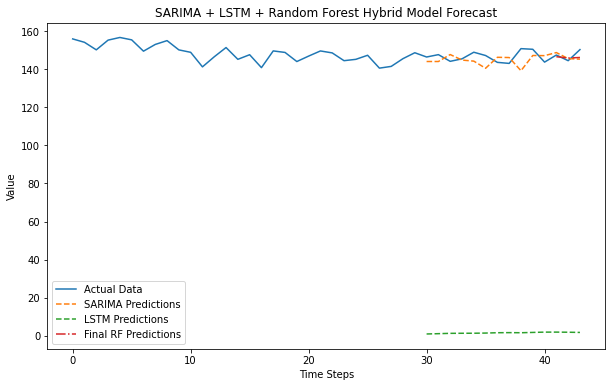

In [20]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# Merge the datasets with suffixes to avoid column name conflicts
data = ds1.merge(ds2, on='yyyy', suffixes=('_ds1', '_ds2')) \
          .merge(ds3, on='yyyy', suffixes=('', '_ds3')) \
          .merge(ds4, on='yyyy', suffixes=('', '_ds4'))

# Drop the "yyyy" column and select the target variable (for this example, "All Regions_ds1")
target = data['All Regions_ds1'].values

# 2. Fit a SARIMA Model
sarima_order = (1, 1, 1)
seasonal_order = (0, 1, 1, 12)  # Example orders; should be tuned
sarima_model = SARIMAX(target, order=sarima_order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit(disp=False)

# SARIMA predictions and residuals
sarima_predictions = sarima_results.predict(start=0, end=len(target)-1)
residuals = target - sarima_predictions

# 3. Train an LSTM on the residuals
scaler = MinMaxScaler(feature_range=(0, 1))
residuals_scaled = scaler.fit_transform(residuals.reshape(-1, 1))

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 30  # Choose an appropriate sequence length
X_lstm, y_lstm = create_sequences(residuals_scaled, sequence_length)

# Reshape for LSTM input (samples, time steps, features)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Build and train the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# LSTM predictions (on the entire dataset)
lstm_predictions = lstm_model.predict(X_lstm)
lstm_predictions_rescaled = scaler.inverse_transform(lstm_predictions)

# 4. Train a Random Forest model using the original features, SARIMA predictions, and LSTM predictions
combined_features = np.column_stack((data.iloc[sequence_length:].drop(columns=['yyyy']).values,
                                     sarima_predictions[sequence_length:],
                                     lstm_predictions_rescaled.flatten()))

# Train-test split for Random Forest
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(combined_features, target[sequence_length:], test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_rf_train, y_rf_train)

# Make final predictions with the Random Forest model
rf_predictions = rf_model.predict(X_rf_test)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(target)), target, label='Actual Data')
plt.plot(range(sequence_length, len(sarima_predictions)), sarima_predictions[sequence_length:], label='SARIMA Predictions', linestyle='--')
plt.plot(range(sequence_length, len(lstm_predictions_rescaled) + sequence_length), lstm_predictions_rescaled, label='LSTM Predictions', linestyle='--')
plt.plot(range(sequence_length + len(y_rf_train), len(target)), rf_predictions, label='Final RF Predictions', linestyle='-.')
plt.legend()
plt.title('SARIMA + LSTM + Random Forest Hybrid Model Forecast')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.show()


C:\Users\janis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\janis\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.1001 - val_loss: 0.0710
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0735 - val_loss: 0.0457
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - loss: 0.0504 - val_loss: 0.0246
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 0.0310 - val_loss: 0.0089
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 0.0104 - val_loss: 6.9235e-04
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0055 - val_loss: 0.0092
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 0.0120 - val_loss: 0.0124
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0126 - val_loss: 0.0063
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 0.0079 - val_loss: 0.0027
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 0.0

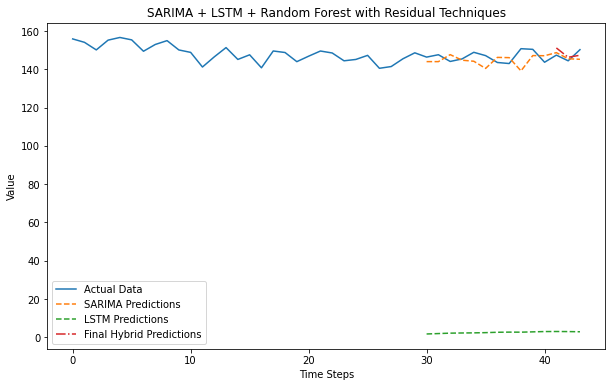

In [21]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Merge the datasets with suffixes to avoid column name conflicts
data = ds1.merge(ds2, on='yyyy', suffixes=('_ds1', '_ds2')) \
          .merge(ds3, on='yyyy', suffixes=('', '_ds3')) \
          .merge(ds4, on='yyyy', suffixes=('', '_ds4'))

# Drop the "yyyy" column and select the target variable (for this example, "All Regions_ds1")
target = data['All Regions_ds1'].values

# Step 1: Fit SARIMA model
sarima_order = (1, 1, 1)
seasonal_order = (0, 1, 1, 12)  # Example orders; should be tuned
sarima_model = SARIMAX(target, order=sarima_order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit(disp=False)

# SARIMA predictions and residuals
sarima_predictions = sarima_results.predict(start=0, end=len(target)-1)
residuals_sarima = target - sarima_predictions

# Step 2: Train LSTM on SARIMA residuals
scaler = MinMaxScaler(feature_range=(0, 1))
residuals_scaled = scaler.fit_transform(residuals_sarima.reshape(-1, 1))

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 30  # Choose an appropriate sequence length
X_lstm, y_lstm = create_sequences(residuals_scaled, sequence_length)

# Reshape for LSTM input (samples, time steps, features)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Build and train the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# LSTM predictions (on the entire dataset)
lstm_predictions = lstm_model.predict(X_lstm)
lstm_predictions_rescaled = scaler.inverse_transform(lstm_predictions)

# Step 3: Compute residuals from the LSTM model
residuals_lstm = residuals_sarima[sequence_length:] - lstm_predictions_rescaled.flatten()

# Step 4: Train Random Forest on the LSTM residuals
combined_features = np.column_stack((data.iloc[sequence_length:].drop(columns=['yyyy']).values,
                                     sarima_predictions[sequence_length:],
                                     lstm_predictions_rescaled.flatten()))

# Train-test split for Random Forest
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(combined_features, residuals_lstm, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_rf_train, y_rf_train)

# Make final predictions with the Random Forest model
rf_predictions = rf_model.predict(X_rf_test)

# Add the final residual predictions back to the SARIMA + LSTM predictions
final_predictions = sarima_predictions[sequence_length + len(y_rf_train):] + lstm_predictions_rescaled[len(y_rf_train):].flatten() + rf_predictions

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(target)), target, label='Actual Data')
plt.plot(range(sequence_length, len(sarima_predictions)), sarima_predictions[sequence_length:], label='SARIMA Predictions', linestyle='--')
plt.plot(range(sequence_length, len(lstm_predictions_rescaled) + sequence_length), lstm_predictions_rescaled, label='LSTM Predictions', linestyle='--')
plt.plot(range(sequence_length + len(y_rf_train), len(target)), final_predictions, label='Final Hybrid Predictions', linestyle='-.')
plt.legend()
plt.title('SARIMA + LSTM + Random Forest with Residual Techniques')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.show()


C:\Users\janis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\janis\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - loss: 0.1953 - val_loss: 0.2380
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - loss: 0.1560 - val_loss: 0.1971
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - loss: 0.1298 - val_loss: 0.1602
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step - loss: 0.1028 - val_loss: 0.1263
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - loss: 0.0789 - val_loss: 0.0950
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step - loss: 0.0594 - val_loss: 0.0665
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0456 - val_loss: 0.0420
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0300 - val_loss: 0.0244
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 0.0239 - val_loss: 0.0170
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - loss: 0.0434 - val_loss: 0.0169
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 0.0492 - val_loss: 0.0169
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - loss: 0.0498 - v

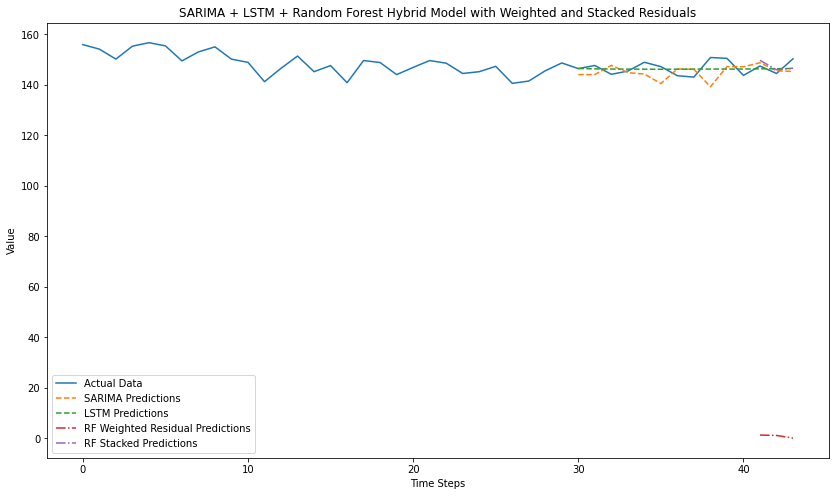

In [22]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


# Merge the datasets with suffixes to avoid column name conflicts
data = ds1.merge(ds2, on='yyyy', suffixes=('_ds1', '_ds2')) \
          .merge(ds3, on='yyyy', suffixes=('', '_ds3')) \
          .merge(ds4, on='yyyy', suffixes=('', '_ds4'))

# Drop the "yyyy" column and select the target variable (for this example, "All Regions_ds1")
target = data['All Regions_ds1'].values

# Step 1: Fit a SARIMA model
sarima_order = (1, 1, 1)
seasonal_order = (0, 1, 1, 12)  # Example orders; should be tuned
sarima_model = SARIMAX(target, order=sarima_order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit(disp=False)

# SARIMA predictions and residuals
sarima_predictions = sarima_results.predict(start=0, end=len(target)-1)
residuals_sarima = target - sarima_predictions

# Step 2: Train LSTM on the original data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(target.reshape(-1, 1))

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 30  # Choose an appropriate sequence length
X_lstm, y_lstm = create_sequences(data_scaled, sequence_length)

# Reshape for LSTM input (samples, time steps, features)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Build and train the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# LSTM predictions (on the entire dataset)
lstm_predictions = lstm_model.predict(X_lstm)
lstm_predictions_rescaled = scaler.inverse_transform(lstm_predictions)

# Step 3: Compute residuals from the LSTM predictions
residuals_lstm = target[sequence_length:] - lstm_predictions_rescaled.flatten()

# Step 4A: Weighted Average Residuals
# Calculate MAE for SARIMA and LSTM
mae_sarima = mean_absolute_error(target[sequence_length:], sarima_predictions[sequence_length:])
mae_lstm = mean_absolute_error(target[sequence_length:], lstm_predictions_rescaled.flatten())

# Calculate weights based on inverse MAE
weight_sarima = 1 / mae_sarima
weight_lstm = 1 / mae_lstm
total_weight = weight_sarima + weight_lstm

# Normalize weights
weight_sarima /= total_weight
weight_lstm /= total_weight

# Compute weighted average of residuals
weighted_residuals = weight_sarima * residuals_sarima[sequence_length:] + weight_lstm * residuals_lstm

# Step 4B: Stacking Approach
# Use SARIMA and LSTM residuals as separate features
stacked_features = np.column_stack((residuals_sarima[sequence_length:], residuals_lstm))

# Step 5: Train Random Forest using both approaches (weighted residuals and stacked features)
# Random Forest for Weighted Residuals
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(data.iloc[sequence_length:].drop(columns=['yyyy']).values,
                                                                weighted_residuals, test_size=0.2, random_state=42)
rf_model_weighted = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_weighted.fit(X_rf_train, y_rf_train)
rf_weighted_predictions = rf_model_weighted.predict(X_rf_test)

# Random Forest for Stacked Features
X_rf_train_stack, X_rf_test_stack, y_rf_train_stack, y_rf_test_stack = train_test_split(stacked_features,
                                                                                        target[sequence_length:], test_size=0.2, random_state=42)
rf_model_stacked = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_stacked.fit(X_rf_train_stack, y_rf_train_stack)
rf_stacked_predictions = rf_model_stacked.predict(X_rf_test_stack)

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(range(len(target)), target, label='Actual Data')
plt.plot(range(sequence_length, len(sarima_predictions)), sarima_predictions[sequence_length:], label='SARIMA Predictions', linestyle='--')
plt.plot(range(sequence_length, len(lstm_predictions_rescaled) + sequence_length), lstm_predictions_rescaled, label='LSTM Predictions', linestyle='--')
plt.plot(range(sequence_length + len(y_rf_train), len(target)), rf_weighted_predictions, label='RF Weighted Residual Predictions', linestyle='-.')
plt.plot(range(sequence_length + len(y_rf_train_stack), len(target)), rf_stacked_predictions, label='RF Stacked Predictions', linestyle='-.')
plt.legend()
plt.title('SARIMA + LSTM + Random Forest Hybrid Model with Weighted and Stacked Residuals')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.show()


C:\Users\janis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\janis\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0659 - val_loss: 0.0453
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.0487 - val_loss: 0.0261
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 0.0276 - val_loss: 0.0110
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 0.0140 - val_loss: 0.0018
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 0.0036 - val_loss: 8.5767e-04
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.0021 - val_loss: 0.0071
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.0172 - val_loss: 0.0090
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 0.0083 - val_loss: 0.0078
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.0157 - val_loss: 0.0042
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.0047 - val_loss: 0.0014
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.0039 - val_loss: 2.3343e-04
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss

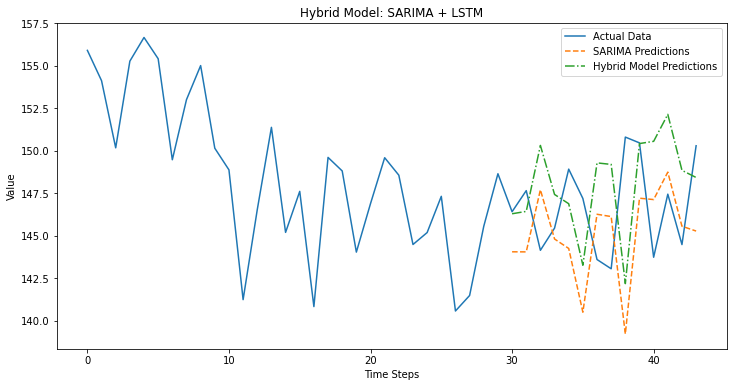

In [23]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Fit a SARIMA model
sarima_order = (1, 1, 1)
seasonal_order = (0, 1, 1, 12)  # Example orders; adjust based on the data
sarima_model = SARIMAX(target, order=sarima_order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit(disp=False)

# SARIMA predictions
sarima_predictions = sarima_results.predict(start=0, end=len(target)-1)
residuals = target - sarima_predictions

# Step 2: Scale the residuals for LSTM training
scaler = MinMaxScaler(feature_range=(0, 1))
residuals_scaled = scaler.fit_transform(residuals.reshape(-1, 1))

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 30  # You can adjust this
X_lstm, y_lstm = create_sequences(residuals_scaled, sequence_length)

# Reshape for LSTM input
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Step 3: Build and train the LSTM model on residuals
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train-test split for LSTM
X_train, X_val, y_train, y_val = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Train the LSTM model
history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# LSTM predictions on residuals
lstm_residual_predictions = lstm_model.predict(X_lstm)
lstm_residual_predictions_rescaled = scaler.inverse_transform(lstm_residual_predictions)

# Step 4: Combine SARIMA and LSTM predictions
final_predictions = sarima_predictions[sequence_length:] + lstm_residual_predictions_rescaled.flatten()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(target, label='Actual Data')
plt.plot(range(sequence_length, len(sarima_predictions)), sarima_predictions[sequence_length:], label='SARIMA Predictions', linestyle='--')
plt.plot(range(sequence_length, len(final_predictions) + sequence_length), final_predictions, label='Hybrid Model Predictions', linestyle='-.')
plt.legend()
plt.title('Hybrid Model: SARIMA + LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.show()


Columns in the merged dataset:
Index(['yyyy', 'Sea of Okhotsk_x', 'Bering Sea_x', 'Hudson Bay_x',
       'Baffin Bay_x', 'Greenland Sea_x', 'Barent Sea', 'Kara Sea_x',
       'Laptev Sea_x', 'East Siberian Sea_x', 'Chukchi Sea_x',
       'Beaufort Sea_x', 'Canadian Archipelago_x', ' Central Arctic',
       'All Regions_x', 'Sea of Okhotsk_y', 'Bering Sea_y', 'Hudson Bay_y',
       'Baffin Bay_y', 'Greenland Sea_y', 'Barents Sea', 'Kara Sea_y',
       'Laptev Sea_y', 'East Siberian Sea_y', 'Chukchi Sea_y',
       'Beaufort Sea_y', 'Canadian Archipelago_y', 'Central Arctic',
       'All Regions_y'],
      dtype='object')
Best SARIMA Parameters: (0, 1, 1, 0, 0, 0)
Best AIC: 225.21843534030862
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0012 - val_loss: 4.4348e-04
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step - loss: 4.2336e-04 - val_loss: 1.8207e-05
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - loss: 2.2135e-04 - val_loss: 7.9073e-05
Epoch 4/100
1/1 ━━━━━━━━━━━

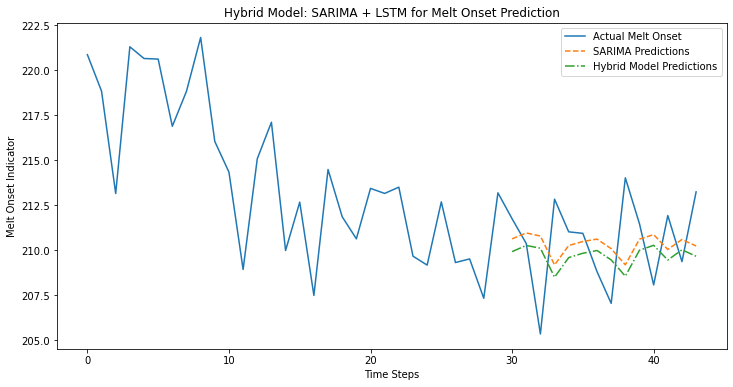

In [25]:
import numpy as np
import pandas as pd
import itertools
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Suppress warnings to keep the output clean
warnings.filterwarnings("ignore")

# Step 2: Merge the datasets based on a common column (e.g., 'yyyy' for the year)
# Assuming 'yyyy' is the common column in both datasets
data = ds1.merge(ds2, on='yyyy')

# Step 3: Aggregate data from relevant regions to create a time series
# Print the column names of the merged dataset to identify the region-based columns
print("Columns in the merged dataset:")
print(data.columns)
# Update this list with the correct region-based column names based on the printed output
regions = list(data.columns)  # Replace with actual column names

# Aggregate data from the relevant regions to create a time series
data['Melt_Onset'] = data[regions].mean(axis=1)


# Calculate the mean across these regions
data['Melt_Onset'] = data[regions].mean(axis=1)

# Extract the target time series for melt onset prediction
target = data['Melt_Onset'].values

# Step 4: Grid Search for SARIMA Hyperparameter Tuning
p = d = q = range(0, 2)  # Non-seasonal parameters
P = D = Q = range(0, 1)  # Seasonal parameters
m = 12  # Assuming yearly seasonality

# Generate all combinations of p, d, q and P, D, Q
parameter_combinations = list(itertools.product(p, d, q, P, D, Q))

# Track the best model
best_aic = float("inf")
best_params = None
best_model = None

# Perform grid search
for params in parameter_combinations:
    try:
        # Fit SARIMA model
        sarima_model = SARIMAX(target,
                               order=(params[0], params[1], params[2]),
                               seasonal_order=(params[3], params[4], params[5], m))
        sarima_results = sarima_model.fit(disp=False)

        # Check if current model is better (lower AIC)
        if sarima_results.aic < best_aic:
            best_aic = sarima_results.aic
            best_params = params
            best_model = sarima_results
    except Exception as e:
        continue  # Skip combinations that fail

# Display the best parameters and corresponding AIC
print(f"Best SARIMA Parameters: {best_params}")
print(f"Best AIC: {best_aic}")

# Step 5: Fit the Best SARIMA Model
best_sarima_model = SARIMAX(target,
                            order=(best_params[0], best_params[1], best_params[2]),
                            seasonal_order=(best_params[3], best_params[4], best_params[5], m))
best_sarima_results = best_sarima_model.fit(disp=False)

# SARIMA predictions
sarima_predictions = best_sarima_results.predict(start=0, end=len(target)-1)
residuals = target - sarima_predictions

# Step 6: Train the LSTM Model on the Residuals
scaler = MinMaxScaler(feature_range=(0, 1))
residuals_scaled = scaler.fit_transform(residuals.reshape(-1, 1))

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 30  # Adjust this based on your data
X_lstm, y_lstm = create_sequences(residuals_scaled, sequence_length)

# Reshape for LSTM input
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Build and train the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train-test split for LSTM
X_train, X_val, y_train, y_val = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Train the LSTM model
history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# LSTM predictions on residuals
lstm_residual_predictions = lstm_model.predict(X_lstm)
lstm_residual_predictions_rescaled = scaler.inverse_transform(lstm_residual_predictions)

# Step 7: Combine SARIMA and LSTM predictions for final prediction
final_predictions = sarima_predictions[sequence_length:] + lstm_residual_predictions_rescaled.flatten()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(target, label='Actual Melt Onset')
plt.plot(range(sequence_length, len(sarima_predictions)), sarima_predictions[sequence_length:], label='SARIMA Predictions', linestyle='--')
plt.plot(range(sequence_length, len(final_predictions) + sequence_length), final_predictions, label='Hybrid Model Predictions', linestyle='-.')
plt.legend()
plt.title('Hybrid Model: SARIMA + LSTM for Melt Onset Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Melt Onset Indicator')
plt.show()


Columns in the merged dataset:
Index(['yyyy', 'Sea of Okhotsk_x', 'Bering Sea_x', 'Hudson Bay_x',
       'Baffin Bay_x', 'Greenland Sea_x', 'Barent Sea', 'Kara Sea_x',
       'Laptev Sea_x', 'East Siberian Sea_x', 'Chukchi Sea_x',
       'Beaufort Sea_x', 'Canadian Archipelago_x', ' Central Arctic',
       'All Regions_x', 'Sea of Okhotsk_y', 'Bering Sea_y', 'Hudson Bay_y',
       'Baffin Bay_y', 'Greenland Sea_y', 'Barents Sea', 'Kara Sea_y',
       'Laptev Sea_y', 'East Siberian Sea_y', 'Chukchi Sea_y',
       'Beaufort Sea_y', 'Canadian Archipelago_y', 'Central Arctic',
       'All Regions_y'],
      dtype='object')
Best SARIMA Parameters: (0, 1, 1, 0, 0, 0)
Best AIC: 225.21843534030862
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0014 - val_loss: 5.5712e-04
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - loss: 4.3223e-04 - val_loss: 3.8394e-05
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 1.8070e-04 - val_loss: 8.2128e-05
Epoch 4/100
1/1 ━━━━━━━━━━━━━

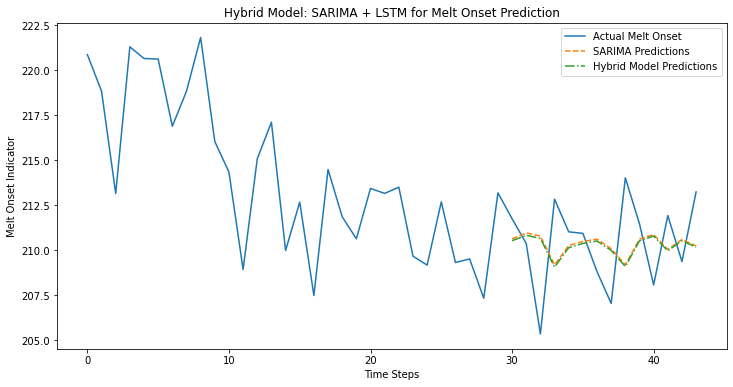

In [26]:
import numpy as np
import pandas as pd
import itertools
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Suppress warnings to keep the output clean
warnings.filterwarnings("ignore")



# Step 2: Merge the datasets based on a common column (e.g., 'yyyy' for the year)
# Assuming 'yyyy' is the common column in both datasets
data = ds1.merge(ds2, on='yyyy')

# Step 3: Aggregate data from relevant regions to create a time series
# Print the column names of the merged dataset to identify the region-based columns
print("Columns in the merged dataset:")
print(data.columns)
# Update this list with the correct region-based column names based on the printed output
regions = list(data.columns)  # Replace with actual column names

# Aggregate data from the relevant regions to create a time series
data['Melt_Onset'] = data[regions].mean(axis=1)


# Calculate the mean across these regions
data['Melt_Onset'] = data[regions].mean(axis=1)

# Extract the target time series for melt onset prediction
target = data['Melt_Onset'].values

# Step 4: Grid Search for SARIMA Hyperparameter Tuning
p = d = q = range(0, 2)  # Non-seasonal parameters
P = D = Q = range(0, 1)  # Seasonal parameters
m = 12  # Assuming yearly seasonality

# Generate all combinations of p, d, q and P, D, Q
parameter_combinations = list(itertools.product(p, d, q, P, D, Q))

# Track the best model
best_aic = float("inf")
best_params = None
best_model = None

# Perform grid search
for params in parameter_combinations:
    try:
        # Fit SARIMA model
        sarima_model = SARIMAX(target,
                               order=(params[0], params[1], params[2]),
                               seasonal_order=(params[3], params[4], params[5], m))
        sarima_results = sarima_model.fit(disp=False)

        # Check if current model is better (lower AIC)
        if sarima_results.aic < best_aic:
            best_aic = sarima_results.aic
            best_params = params
            best_model = sarima_results
    except Exception as e:
        continue  # Skip combinations that fail

# Display the best parameters and corresponding AIC
print(f"Best SARIMA Parameters: {best_params}")
print(f"Best AIC: {best_aic}")

# Step 5: Fit the Best SARIMA Model
best_sarima_model = SARIMAX(target,
                            order=(best_params[0], best_params[1], best_params[2]),
                            seasonal_order=(best_params[3], best_params[4], best_params[5], m))
best_sarima_results = best_sarima_model.fit(disp=False)

# SARIMA predictions
sarima_predictions = best_sarima_results.predict(start=0, end=len(target)-1)
residuals = target - sarima_predictions

# Step 6: Train the LSTM Model on the Residuals
scaler = MinMaxScaler(feature_range=(0, 1))
residuals_scaled = scaler.fit_transform(residuals.reshape(-1, 1))

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 30  # Adjust this based on your data
X_lstm, y_lstm = create_sequences(residuals_scaled, sequence_length)

# Reshape for LSTM input
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Build and train the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train-test split for LSTM
X_train, X_val, y_train, y_val = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Train the LSTM model
history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# LSTM predictions on residuals
lstm_residual_predictions = lstm_model.predict(X_lstm)
lstm_residual_predictions_rescaled = scaler.inverse_transform(lstm_residual_predictions)

# Step 7: Combine SARIMA and LSTM predictions for final prediction
final_predictions = sarima_predictions[sequence_length:] + lstm_residual_predictions_rescaled.flatten()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(target, label='Actual Melt Onset')
plt.plot(range(sequence_length, len(sarima_predictions)), sarima_predictions[sequence_length:], label='SARIMA Predictions', linestyle='--')
plt.plot(range(sequence_length, len(final_predictions) + sequence_length), final_predictions, label='Hybrid Model Predictions', linestyle='-.')
plt.legend()
plt.title('Hybrid Model: SARIMA + LSTM for Melt Onset Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Melt Onset Indicator')
plt.show()



Columns in the merged dataset:
Index(['yyyy', 'Sea of Okhotsk', 'Bering Sea_x', 'Hudson Bay_x',
       'Baffin Bay_x', 'Greenland Sea_x', 'Barents Sea', 'Kara Sea_x',
       'Laptev Sea_x', 'East Siberian Sea_x', 'Chukchi Sea_x',
       'Beaufort Sea_x', 'Canadian Archipelago_x', 'Central Arctic_x',
       'All Regions_x', 'Sea of Oktosk ', 'Bering Sea_y', 'Hudson Bay_y',
       'Baffin Bay_y', 'Greenland Sea_y', 'Barent Sea', 'Kara Sea_y',
       'Laptev Sea_y', 'East Siberian Sea_y', 'Chukchi Sea_y',
       'Beaufort Sea_y', 'Canadian Archipelago_y', 'Central Arctic_y',
       'All Regions_y'],
      dtype='object')
Best SARIMA Parameters: (0, 1, 1, 0, 0, 0)
Best AIC: 263.6769065173724
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.0011 - val_loss: 3.1961e-04
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.2412e-04 - val_loss: 1.2904e-04
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 3.2663e-04 - val_loss: 2.4493e-04
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━

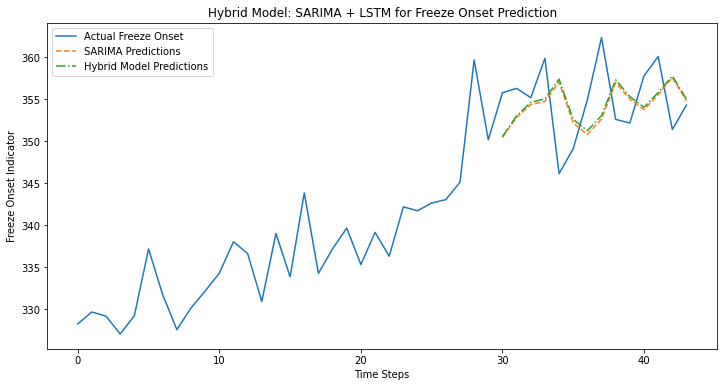

In [27]:
import numpy as np
import pandas as pd
import itertools
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Suppress warnings to keep the output clean
warnings.filterwarnings("ignore")

# Step 2: Merge the datasets based on a common column (e.g., 'yyyy' for the year)
# Assuming 'yyyy' is the common column in both datasets
data = ds3.merge(ds4, on='yyyy')

# Step 3: Aggregate data from relevant regions to create a time series for freeze onset
print("Columns in the merged dataset:")
print(data.columns)
# Update this list with the correct region-based column names based on the printed output
regions = list(data.columns)  # Replace with actual column names

# Calculate the mean across these regions
data['Freeze_Onset'] = data[regions].mean(axis=1)

# Extract the target time series for freeze onset prediction
target = data['Freeze_Onset'].values

# Step 4: Grid Search for SARIMA Hyperparameter Tuning
p = d = q = range(0, 2)  # Non-seasonal parameters
P = D = Q = range(0, 1)  # Seasonal parameters
m = 12  # Assuming yearly seasonality

# Generate all combinations of p, d, q and P, D, Q
parameter_combinations = list(itertools.product(p, d, q, P, D, Q))

# Track the best model
best_aic = float("inf")
best_params = None
best_model = None

# Perform grid search
for params in parameter_combinations:
    try:
        # Fit SARIMA model
        sarima_model = SARIMAX(target,
                               order=(params[0], params[1], params[2]),
                               seasonal_order=(params[3], params[4], params[5], m))
        sarima_results = sarima_model.fit(disp=False)

        # Check if current model is better (lower AIC)
        if sarima_results.aic < best_aic:
            best_aic = sarima_results.aic
            best_params = params
            best_model = sarima_results
    except Exception as e:
        continue  # Skip combinations that fail

# Display the best parameters and corresponding AIC
print(f"Best SARIMA Parameters: {best_params}")
print(f"Best AIC: {best_aic}")

# Step 5: Fit the Best SARIMA Model
best_sarima_model = SARIMAX(target,
                            order=(best_params[0], best_params[1], best_params[2]),
                            seasonal_order=(best_params[3], best_params[4], best_params[5], m))
best_sarima_results = best_sarima_model.fit(disp=False)

# SARIMA predictions
sarima_predictions = best_sarima_results.predict(start=0, end=len(target)-1)
residuals = target - sarima_predictions

# Step 6: Train the LSTM Model on the Residuals
scaler = MinMaxScaler(feature_range=(0, 1))
residuals_scaled = scaler.fit_transform(residuals.reshape(-1, 1))

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 30  # Adjust this based on your data
X_lstm, y_lstm = create_sequences(residuals_scaled, sequence_length)

# Reshape for LSTM input
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Build and train the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train-test split for LSTM
X_train, X_val, y_train, y_val = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Train the LSTM model
history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# LSTM predictions on residuals
lstm_residual_predictions = lstm_model.predict(X_lstm)
lstm_residual_predictions_rescaled = scaler.inverse_transform(lstm_residual_predictions)

# Step 7: Combine SARIMA and LSTM predictions for final prediction
final_predictions = sarima_predictions[sequence_length:] + lstm_residual_predictions_rescaled.flatten()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(target, label='Actual Freeze Onset')
plt.plot(range(sequence_length, len(sarima_predictions)), sarima_predictions[sequence_length:], label='SARIMA Predictions', linestyle='--')
plt.plot(range(sequence_length, len(final_predictions) + sequence_length), final_predictions, label='Hybrid Model Predictions', linestyle='-.')
plt.legend()
plt.title('Hybrid Model: SARIMA + LSTM for Freeze Onset Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Freeze Onset Indicator')
plt.show()


In [34]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Function to load data and preprocess
def load_and_preprocess(file_path, region_column):
    data = pd.read_excel(file_path)
    target = data[region_column].values  # Target variable (melt or freeze onset)
    years = data['yyyy'].values  # Extract years for plotting
    return target, years

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Function to calculate error metrics
def calculate_error_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

# Function for fine-tuning LSTM
def fine_tune_lstm(X_lstm, y_lstm):
    # Model architecture tuning
    lstm_model = Sequential()
    lstm_model.add(LSTM(64, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))  # Increased units to 64
    lstm_model.add(Dropout(0.3))  # Increased dropout to 0.3
    lstm_model.add(LSTM(64, return_sequences=True))  # Added another LSTM layer with 64 units
    lstm_model.add(Dropout(0.3))
    lstm_model.add(LSTM(32, return_sequences=False))  # Added a final LSTM layer with 32 units
    lstm_model.add(Dropout(0.3))
    lstm_model.add(Dense(1))

    # Compile the model
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')

    # Callbacks for early stopping and learning rate reduction
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    # Train the model
    lstm_model.fit(X_lstm, y_lstm, epochs=100, batch_size=32, validation_split=0.2, verbose=1,
                   callbacks=[early_stopping, reduce_lr])

    return lstm_model

# Function to create interactive plot using Plotly
def plot_forecast_with_plotly(years, target, sarima_predictions, combined_predictions, final_predictions, sequence_length, title):
    fig = go.Figure()

    # Plot actual data
    fig.add_trace(go.Scatter(x=years, y=target, mode='lines', name='Actual', line=dict(color='blue')))

    # SARIMA Predictions
    fig.add_trace(go.Scatter(x=years[sequence_length:], y=sarima_predictions[sequence_length:], mode='lines', 
                             name='SARIMA Predictions', line=dict(color='orange', dash='dash')))

    # Combined SARIMA + LSTM Predictions
    fig.add_trace(go.Scatter(x=years[sequence_length:], y=combined_predictions, mode='lines',
                             name='SARIMA + LSTM Predictions', line=dict(color='green', dash='dot')))

    # Final Hybrid Predictions (SARIMA + LSTM + Random Forest)
    fig.add_trace(go.Scatter(x=years[sequence_length:], y=final_predictions, mode='lines',
                             name='Final Hybrid Predictions', line=dict(color='red', dash='dot')))

    # Update layout
    fig.update_layout(title=title, xaxis_title='Year', yaxis_title='Melt/Freeze Onset (Days)',
                      legend=dict(x=0.01, y=0.99), template='plotly_white')

    fig.show()

# Hybrid model function with error metrics calculation
def hybrid_model_with_error_metrics(file_path, region_column, title):
    # Load and preprocess data
    target, years = load_and_preprocess(file_path, region_column)

    # Step 1: Fit SARIMA model
    sarima_model = SARIMAX(target, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_results = sarima_model.fit(disp=False)

    # SARIMA predictions
    sarima_predictions = sarima_results.predict(start=0, end=len(target)-1)
    residuals = target - sarima_predictions

    # Step 2: LSTM model for residuals
    scaler = MinMaxScaler(feature_range=(0, 1))
    residuals_scaled = scaler.fit_transform(residuals.reshape(-1, 1))

    sequence_length = 30
    X_lstm, y_lstm = create_sequences(residuals_scaled, sequence_length)
    X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

    # Train fine-tuned LSTM model
    lstm_model = fine_tune_lstm(X_lstm, y_lstm)

    # LSTM predictions
    lstm_residual_predictions = lstm_model.predict(X_lstm)
    lstm_residual_predictions_rescaled = scaler.inverse_transform(lstm_residual_predictions)

    # Combined SARIMA + LSTM predictions
    combined_predictions = sarima_predictions[sequence_length:] + lstm_residual_predictions_rescaled.flatten()

    # Step 3: Random Forest on residuals of combined model
    final_residuals = target[sequence_length:] - combined_predictions
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(np.arange(len(final_residuals)).reshape(-1, 1), final_residuals)
    rf_residuals = rf_model.predict(np.arange(len(final_residuals)).reshape(-1, 1))

    # Final predictions: SARIMA + LSTM + Random Forest
    final_predictions = combined_predictions + rf_residuals

    # Calculate error metrics for the final predictions
    mae, rmse, mape = calculate_error_metrics(target[sequence_length:], final_predictions)

    # Print error metrics
    print(f'Error Metrics for {title}:')
    print(f'MAE: {mae:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MAPE: {mape:.2f}%')

    # Plotting results using Plotly
    plot_forecast_with_plotly(years, target, sarima_predictions, combined_predictions, final_predictions, sequence_length, title)

# Running the hybrid model with error metrics for each dataset
hybrid_model_with_error_metrics('DS1.xlsx', 'Hudson Bay', 'Melt Onset for DS1 (Early Melt)')
hybrid_model_with_error_metrics('DS2.xlsx', 'Hudson Bay', 'Melt Onset for DS2 (Melt Onset)')
hybrid_model_with_error_metrics('DS3.xlsx', 'Hudson Bay', 'Freeze Onset for DS3')
hybrid_model_with_error_metrics('DS4.xlsx', 'Hudson Bay', 'Freeze Onset for DS4')


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.1404 - val_loss: 0.0858 - learning_rate: 0.0010
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.1052 - val_loss: 0.0599 - learning_rate: 0.0010
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 0.0762 - val_loss: 0.0371 - learning_rate: 0.0010
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 0.0532 - val_loss: 0.0179 - learning_rate: 0.0010
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 0.0309 - val_loss: 0.0064 - learning_rate: 0.0010
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 0.0116 - val_loss: 0.0116 - learning_rate: 0.0010
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 0.0162 - val_loss: 0.0300 - learning_rate: 0.0010
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 0.0217 - val_loss: 0.0316 - learning_rate: 0.0010
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 0.0308 - val_loss: 0.0205 - learning_rate: 0.0010
Epoch 10/100
1/1 ━━━━━

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.1124 - val_loss: 0.0722 - learning_rate: 0.0010
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 0.0884 - val_loss: 0.0441 - learning_rate: 0.0010
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - loss: 0.0560 - val_loss: 0.0216 - learning_rate: 0.0010
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - loss: 0.0281 - val_loss: 0.0064 - learning_rate: 0.0010
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 0.0160 - val_loss: 0.0051 - learning_rate: 0.0010
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 0.0013 - val_loss: 0.0218 - learning_rate: 0.0010
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 0.0088 - val_loss: 0.0373 - learning_rate: 0.0010
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 0.0374 - val_loss: 0.0294 - learning_rate: 0.0010
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 0.0213 - val_loss: 0.0165 - learning_rate: 0.0010
Epoch 10/100
1/1 ━━━━━

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0997 - val_loss: 0.0730 - learning_rate: 0.0010
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.0707 - val_loss: 0.0454 - learning_rate: 0.0010
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 0.0488 - val_loss: 0.0222 - learning_rate: 0.0010
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 0.0261 - val_loss: 0.0054 - learning_rate: 0.0010
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0056 - val_loss: 3.9475e-04 - learning_rate: 0.0010
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 0.0073 - val_loss: 0.0050 - learning_rate: 0.0010
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 0.0150 - val_loss: 0.0056 - learning_rate: 0.0010
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.0179 - val_loss: 0.0025 - learning_rate: 0.0010
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 0.0121 - val_loss: 3.7444e-04 - learning_rate: 0.0010
Epoch 10/100
1

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.1029 - val_loss: 0.0681 - learning_rate: 0.0010
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 0.0687 - val_loss: 0.0410 - learning_rate: 0.0010
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 0.0436 - val_loss: 0.0176 - learning_rate: 0.0010
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 0.0154 - val_loss: 0.0023 - learning_rate: 0.0010
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 0.0059 - val_loss: 0.0030 - learning_rate: 0.0010
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 0.0079 - val_loss: 0.0122 - learning_rate: 0.0010
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - loss: 0.0195 - val_loss: 0.0125 - learning_rate: 0.0010
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 0.0146 - val_loss: 0.0066 - learning_rate: 0.0010
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - loss: 0.0198 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 10/100
1/1 ━━━━━

In [33]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Load and preprocess data
def load_and_preprocess(file_path, region_column):
    data = pd.read_excel(file_path)
    target = data[region_column].values
    years = data['yyyy'].values
    return target, years

# Function to create sequences for LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Function to fine-tune LSTM model
def fine_tune_lstm(X_lstm, y_lstm):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_lstm, y_lstm, epochs=50, batch_size=32, verbose=1)
    return model

# Function to calculate error metrics
def calculate_error_metrics(true_values, predicted_values):
    mae = np.mean(np.abs(true_values - predicted_values))
    rmse = np.sqrt(np.mean((true_values - predicted_values)**2))
    mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100
    return mae, rmse, mape

# Function to plot results using Plotly
def plot_forecast_with_plotly(years, target, future_years, future_predictions, conf_int, title):
    fig = go.Figure()

    # Historical data
    fig.add_trace(go.Scatter(x=years, y=target, mode='lines', name='Historical Data', line=dict(color='blue')))

    # Future predictions
    fig.add_trace(go.Scatter(x=future_years, y=future_predictions, mode='lines+markers', name='Future Predictions',
                             line=dict(color='red', dash='dash')))

    # Confidence interval
    fig.add_trace(go.Scatter(x=future_years, y=conf_int[:, 0], mode='lines', fill=None,
                             line=dict(color='rgba(255, 0, 0, 0.3)'), showlegend=False))
    fig.add_trace(go.Scatter(x=future_years, y=conf_int[:, 1], mode='lines', fill='tonexty',
                             line=dict(color='rgba(255, 0, 0, 0.3)'), name='95% Confidence Interval'))

    fig.update_layout(title=title, xaxis_title='Year', yaxis_title='Melt Onset (Days)',
                      legend=dict(x=0.01, y=0.99), template='plotly_white')

    fig.show()

# Function to combine SARIMA, LSTM, and Random Forest models
def hybrid_model_with_future_predictions(file_path, region_column, title, forecast_horizon=30):
    # Load and preprocess data
    target, years = load_and_preprocess(file_path, region_column)

    # Step 1: SARIMA model
    sarima_model = SARIMAX(target, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_results = sarima_model.fit(disp=False)

    # Get SARIMA predictions for historical and future periods
    sarima_predictions = sarima_results.predict(start=0, end=len(target)-1)
    sarima_future = sarima_results.forecast(steps=forecast_horizon)

    # Calculate residuals for historical data
    residuals = target - sarima_predictions

    # Step 2: LSTM model for residuals
    scaler = MinMaxScaler(feature_range=(0, 1))
    residuals_scaled = scaler.fit_transform(residuals.reshape(-1, 1))

    sequence_length = 30
    X_lstm, y_lstm = create_sequences(residuals_scaled, sequence_length)
    X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

    # Train LSTM model
    lstm_model = fine_tune_lstm(X_lstm, y_lstm)

    # Prepare last sequence for future predictions
    last_sequence = residuals_scaled[-sequence_length:]
    future_residuals = []

    # Generate future residuals using LSTM
    current_sequence = last_sequence.reshape(1, sequence_length, 1)
    for _ in range(forecast_horizon):
        next_residual = lstm_model.predict(current_sequence)
        future_residuals.append(next_residual[0, 0])
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[0, -1, 0] = next_residual

    future_residuals = np.array(future_residuals).reshape(-1, 1)
    future_residuals = scaler.inverse_transform(future_residuals)

    # Step 3: Random Forest for final adjustments
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    historical_time = np.arange(len(target)).reshape(-1, 1)
    rf_model.fit(historical_time, target - sarima_predictions)

    # Generate future dates for plotting
    future_years = np.arange(years[-1] + 1, years[-1] + forecast_horizon + 1)

    # Combine predictions for future values
    future_predictions = (sarima_future +
                         future_residuals.flatten() +
                         rf_model.predict(np.arange(len(target), len(target) + forecast_horizon).reshape(-1, 1)))

    # Plotting results including future predictions using Plotly
    conf_int = sarima_results.get_forecast(forecast_horizon).conf_int()
    plot_forecast_with_plotly(years, target, future_years, future_predictions, conf_int, f'{title} with Future Predictions')

    return future_predictions, future_years, conf_int

# Function to evaluate model performance on historical data
def evaluate_prediction_accuracy(file_path, region_column, title):
    target, years = load_and_preprocess(file_path, region_column)

    # Use 80% of data for training
    train_size = int(len(target) * 0.8)
    train_data = target[:train_size]
    test_data = target[train_size:]
    test_years = years[train_size:]

    # Make predictions using the hybrid model
    predictions, _, _ = hybrid_model_with_future_predictions(file_path, region_column, title, forecast_horizon=len(test_data))

    # Calculate error metrics
    mae, rmse, mape = calculate_error_metrics(test_data, predictions[:len(test_data)])

    print(f'\nValidation Metrics for {title}:')
    print(f'MAE: {mae:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MAPE: {mape:.2f}%')

# Example usage
forecast_horizon = 10  # Number of years to forecast
for file_path, title in [
    ('DS1.xlsx', 'Early Melt Onset'),
    ('DS2.xlsx', 'Melt Onset'),
    ('DS3.xlsx', 'Freeze Onset DS3'),
    ('DS4.xlsx', 'Freeze Onset DS4')
]:
    print(f"\nProcessing {title}")
    # Evaluate model accuracy
    evaluate_prediction_accuracy(file_path, 'Hudson Bay', title)
    # Generate future predictions
    future_predictions, future_years, confidence_intervals = hybrid_model_with_future_predictions(
        file_path, 'Hudson Bay', title, forecast_horizon)
    print(f"\nFuture Predictions for {title}:")
    for year, pred, ci_lower, ci_upper in zip(
    future_years, future_predictions,
    confidence_intervals[:, 0], confidence_intervals[:, 1]
):
      print(f"Year {year}: {pred:.2f} (95% CI: [{ci_lower:.2f}, {ci_upper:.2f}])")




Processing Early Melt Onset
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1255
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.0937
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0713
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0506
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0299
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0188
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0083
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0047
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0074
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0169
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0176
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0125
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0147
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0072
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0050
Epo


Validation Metrics for Early Melt Onset:
MAE: 8.7283
RMSE: 9.1874
MAPE: 6.99%
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1149
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0821
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0590
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0324
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0168
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0075
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0022
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0160
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0200
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0224
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0149
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0084
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0061
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0057
Epoch 15/50
1/1 ━━━


Future Predictions for Early Melt Onset:
Year 2023: 125.37 (95% CI: [102.25, 137.93])
Year 2024: 123.90 (95% CI: [100.49, 136.83])
Year 2025: 126.06 (95% CI: [102.45, 139.24])
Year 2026: 132.59 (95% CI: [108.77, 146.01])
Year 2027: 126.01 (95% CI: [102.26, 139.37])
Year 2028: 131.93 (95% CI: [107.98, 145.49])
Year 2029: 122.71 (95% CI: [98.55, 136.46])
Year 2030: 121.53 (95% CI: [97.17, 135.47])
Year 2031: 122.16 (95% CI: [97.59, 136.28])
Year 2032: 130.21 (95% CI: [105.44, 144.51])

Processing Melt Onset
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1270
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.1005
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0674
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0462
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0278
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0105
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0086
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84m


Validation Metrics for Melt Onset:
MAE: 7.6449
RMSE: 8.4349
MAPE: 5.18%
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0769
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0543
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0252
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0146
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0023
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0091
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0154
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0172
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0129
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0020
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0055
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0021
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0032
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0042
Epoch 15/50
1/1 ━━━━━━━━━━━


Future Predictions for Melt Onset:
Year 2023: 151.31 (95% CI: [127.14, 161.91])
Year 2024: 149.30 (95% CI: [124.54, 160.37])
Year 2025: 152.25 (95% CI: [127.11, 163.49])
Year 2026: 156.57 (95% CI: [131.02, 167.94])
Year 2027: 151.31 (95% CI: [125.61, 162.52])
Year 2028: 156.91 (95% CI: [130.80, 168.18])
Year 2029: 147.80 (95% CI: [121.26, 159.10])
Year 2030: 148.28 (95% CI: [121.32, 159.61])
Year 2031: 148.73 (95% CI: [121.36, 160.10])
Year 2032: 155.29 (95% CI: [127.50, 166.68])

Processing Freeze Onset DS3
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0926
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0651
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0414
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0256
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0112
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0026
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0024
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━


Validation Metrics for Freeze Onset DS3:
MAE: 6.5868
RMSE: 8.4028
MAPE: 2.00%
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1029
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.0754
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0514
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0334
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0210
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0075
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0012
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0038
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0111
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0155
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0116
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0102
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0045
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0023
Epoch 15/5


Future Predictions for Freeze Onset DS3:
Year 2023: 321.09 (95% CI: [313.35, 347.57])
Year 2024: 323.06 (95% CI: [314.97, 350.13])
Year 2025: 317.68 (95% CI: [309.35, 345.40])
Year 2026: 314.92 (95% CI: [306.39, 343.32])
Year 2027: 319.22 (95% CI: [310.70, 348.13])
Year 2028: 321.80 (95% CI: [313.17, 351.40])
Year 2029: 318.87 (95% CI: [310.14, 349.16])
Year 2030: 318.53 (95% CI: [309.71, 349.49])
Year 2031: 321.83 (95% CI: [312.90, 353.44])
Year 2032: 318.35 (95% CI: [309.32, 350.60])

Processing Freeze Onset DS4
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1106
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.0902
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0690
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0461
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0287
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0142
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0039
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━


Validation Metrics for Freeze Onset DS4:
MAE: 8.8380
RMSE: 10.5209
MAPE: 2.65%
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0941
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0692
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0445
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0241
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0098
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0022
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0069
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0189
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0118
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0103
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0099
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0053
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0015
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0014
Epoch 15/50
1/1 ━━━


Future Predictions for Freeze Onset DS4:
Year 2023: 329.00 (95% CI: [318.69, 350.49])
Year 2024: 330.58 (95% CI: [320.06, 352.45])
Year 2025: 325.19 (95% CI: [314.35, 347.56])
Year 2026: 323.05 (95% CI: [311.93, 345.93])
Year 2027: 328.04 (95% CI: [316.84, 351.26])
Year 2028: 328.83 (95% CI: [317.41, 352.55])
Year 2029: 327.24 (95% CI: [315.61, 351.46])
Year 2030: 327.97 (95% CI: [316.14, 352.69])
Year 2031: 329.85 (95% CI: [317.83, 355.06])
Year 2032: 327.32 (95% CI: [315.11, 353.02])


In [30]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Load and preprocess data
def load_and_preprocess(file_path, region_column):
    data = pd.read_excel(file_path)
    target = data[region_column].values
    years = data['yyyy'].values
    return target, years

# Function to create sequences for LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Function to fine-tune LSTM model
def fine_tune_lstm(X_lstm, y_lstm):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_lstm, y_lstm, epochs=50, batch_size=32, verbose=1)
    return model

# Function to calculate error metrics
def calculate_error_metrics(true_values, predicted_values):
    mae = np.mean(np.abs(true_values - predicted_values))
    rmse = np.sqrt(np.mean((true_values - predicted_values)**2))
    mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100
    return mae, rmse, mape

# Function to plot results using Plotly
def plot_forecast_with_plotly(years, target, future_years, future_predictions, conf_int, title):
    fig = go.Figure()

    # Historical data
    fig.add_trace(go.Scatter(x=years, y=target, mode='lines', name='Historical Data', line=dict(color='blue')))

    # Future predictions
    fig.add_trace(go.Scatter(x=future_years, y=future_predictions, mode='lines+markers', name='Future Predictions',
                             line=dict(color='red', dash='dash')))

    # Confidence interval
    fig.add_trace(go.Scatter(x=future_years, y=conf_int[:, 0], mode='lines', fill=None,
                             line=dict(color='rgba(255, 0, 0, 0.3)'), showlegend=False))
    fig.add_trace(go.Scatter(x=future_years, y=conf_int[:, 1], mode='lines', fill='tonexty',
                             line=dict(color='rgba(255, 0, 0, 0.3)'), name='95% Confidence Interval'))

    fig.update_layout(title=title, xaxis_title='Year', yaxis_title='Melt Onset (Days)',
                      legend=dict(x=0.01, y=0.99), template='plotly_white')

    fig.show()

# Function to combine SARIMA, LSTM, and Random Forest models
def hybrid_model_with_future_predictions(file_path, region_column, title, forecast_horizon=30):
    # Load and preprocess data
    target, years = load_and_preprocess(file_path, region_column)

    # Step 1: SARIMA model
    sarima_model = SARIMAX(target, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_results = sarima_model.fit(disp=False)

    # Get SARIMA predictions for historical and future periods
    sarima_predictions = sarima_results.predict(start=0, end=len(target)-1)
    sarima_future = sarima_results.forecast(steps=forecast_horizon)

    # Calculate residuals for historical data
    residuals = target - sarima_predictions

    # Step 2: LSTM model for residuals
    scaler = MinMaxScaler(feature_range=(0, 1))
    residuals_scaled = scaler.fit_transform(residuals.reshape(-1, 1))

    sequence_length = 30
    X_lstm, y_lstm = create_sequences(residuals_scaled, sequence_length)
    X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

    # Train LSTM model
    lstm_model = fine_tune_lstm(X_lstm, y_lstm)

    # Prepare last sequence for future predictions
    last_sequence = residuals_scaled[-sequence_length:]
    future_residuals = []

    # Generate future residuals using LSTM
    current_sequence = last_sequence.reshape(1, sequence_length, 1)
    for _ in range(forecast_horizon):
        next_residual = lstm_model.predict(current_sequence)
        future_residuals.append(next_residual[0, 0])
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[0, -1, 0] = next_residual

    future_residuals = np.array(future_residuals).reshape(-1, 1)
    future_residuals = scaler.inverse_transform(future_residuals)

    # Step 3: Random Forest for final adjustments
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    historical_time = np.arange(len(target)).reshape(-1, 1)
    rf_model.fit(historical_time, target - sarima_predictions)

    # Generate future dates for plotting
    future_years = np.arange(years[-1] + 1, years[-1] + forecast_horizon + 1)

    # Combine predictions for future values
    future_predictions = (sarima_future +
                         future_residuals.flatten() +
                         rf_model.predict(np.arange(len(target), len(target) + forecast_horizon).reshape(-1, 1)))

    # Plotting results including future predictions using Plotly
    conf_int = sarima_results.get_forecast(forecast_horizon).conf_int()
    plot_forecast_with_plotly(years, target, future_years, future_predictions, conf_int, f'{title} with Future Predictions')

    return future_predictions, future_years, conf_int

# Function to evaluate model performance on historical data
def evaluate_prediction_accuracy(file_path, region_column, title):
    target, years = load_and_preprocess(file_path, region_column)

    # Use 80% of data for training
    train_size = int(len(target) * 0.8)
    train_data = target[:train_size]
    test_data = target[train_size:]
    test_years = years[train_size:]

    # Make predictions using the hybrid model
    predictions, _, _ = hybrid_model_with_future_predictions(file_path, region_column, title, forecast_horizon=len(test_data))

    # Calculate error metrics
    mae, rmse, mape = calculate_error_metrics(test_data, predictions[:len(test_data)])

    print(f'\nValidation Metrics for {title}:')
    print(f'MAE: {mae:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MAPE: {mape:.2f}%')

# Example usage
forecast_horizon = 30  # Number of years to forecast
for file_path, title in [
    ('DS1.xlsx', 'Early Melt Onset'),
    ('DS2.xlsx', 'Melt Onset'),
    ('DS3.xlsx', 'Freeze Onset DS3'),
    ('DS4.xlsx', 'Freeze Onset DS4')
]:
    print(f"\nProcessing {title}")
    # Evaluate model accuracy
    evaluate_prediction_accuracy(file_path, 'Hudson Bay', title)
    # Generate future predictions
    future_predictions, future_years, confidence_intervals = hybrid_model_with_future_predictions(
        file_path, 'Hudson Bay', title, forecast_horizon)
    print(f"\nFuture Predictions for {title}:")
    for year, pred, ci_lower, ci_upper in zip(
    future_years, future_predictions,
    confidence_intervals[:, 0], confidence_intervals[:, 1]
):
      print(f"Year {year}: {pred:.2f} (95% CI: [{ci_lower:.2f}, {ci_upper:.2f}])")



Processing Early Melt Onset
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1269
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.1022
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0676
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0444
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0255
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0139
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0050
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.0083
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0125
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.0267
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0279
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.0111
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0087
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0049
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0041



Validation Metrics for Early Melt Onset:
MAE: 8.3558
RMSE: 9.2720
MAPE: 6.49%
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0660
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0479
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0216
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0067
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.0039
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0126
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0195
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0160
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0136
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0048
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0049
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0069
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0047
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0065
Epoch 15/50
1/1 ━━━━


Future Predictions for Early Melt Onset:
Year 2023: 129.16 (95% CI: [102.25, 137.93])
Year 2024: 127.82 (95% CI: [100.49, 136.83])
Year 2025: 130.18 (95% CI: [102.45, 139.24])
Year 2026: 136.96 (95% CI: [108.77, 146.01])
Year 2027: 130.61 (95% CI: [102.26, 139.37])
Year 2028: 136.77 (95% CI: [107.98, 145.49])
Year 2029: 127.85 (95% CI: [98.55, 136.46])
Year 2030: 126.97 (95% CI: [97.17, 135.47])
Year 2031: 127.84 (95% CI: [97.59, 136.28])
Year 2032: 136.17 (95% CI: [105.44, 144.51])
Year 2033: 140.08 (95% CI: [108.90, 148.36])
Year 2034: 127.83 (95% CI: [96.21, 136.04])
Year 2035: 130.00 (95% CI: [97.82, 138.25])
Year 2036: 128.54 (95% CI: [95.88, 136.71])
Year 2037: 131.18 (95% CI: [98.05, 139.28])
Year 2038: 139.32 (95% CI: [105.73, 147.37])
Year 2039: 130.11 (95% CI: [96.10, 138.13])
Year 2040: 136.13 (95% CI: [101.76, 144.11])
Year 2041: 129.11 (95% CI: [94.36, 137.03])
Year 2042: 131.94 (95% CI: [96.83, 139.82])
Year 2043: 129.50 (95% CI: [94.03, 137.34])
Year 2044: 138.12 (95% C


Validation Metrics for Melt Onset:
MAE: 7.7907
RMSE: 9.0979
MAPE: 5.14%
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0737
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0511
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0290
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.0102
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.0028
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0065
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0125
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0165
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0168
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0097
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0043
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0036
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.0037
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0048
Epoch 15/50
1/1 ━━━━━━━


Future Predictions for Melt Onset:
Year 2023: 151.94 (95% CI: [127.14, 161.91])
Year 2024: 149.93 (95% CI: [124.54, 160.37])
Year 2025: 152.90 (95% CI: [127.11, 163.49])
Year 2026: 157.26 (95% CI: [131.02, 167.94])
Year 2027: 152.06 (95% CI: [125.61, 162.52])
Year 2028: 157.72 (95% CI: [130.80, 168.18])
Year 2029: 148.66 (95% CI: [121.26, 159.10])
Year 2030: 149.19 (95% CI: [121.32, 159.61])
Year 2031: 149.70 (95% CI: [121.36, 160.10])
Year 2032: 156.30 (95% CI: [127.50, 166.68])
Year 2033: 157.58 (95% CI: [128.32, 167.94])
Year 2034: 149.75 (95% CI: [120.05, 160.10])
Year 2035: 152.05 (95% CI: [121.54, 162.76])
Year 2036: 148.84 (95% CI: [117.84, 159.62])
Year 2037: 153.56 (95% CI: [122.09, 164.39])
Year 2038: 157.49 (95% CI: [125.55, 168.39])
Year 2039: 150.75 (95% CI: [118.37, 161.72])
Year 2040: 157.01 (95% CI: [124.25, 168.01])
Year 2041: 148.74 (95% CI: [115.61, 159.78])
Year 2042: 151.35 (95% CI: [117.85, 162.43])
Year 2043: 149.51 (95% CI: [115.64, 160.63])
Year 2044: 157.19 (


Validation Metrics for Freeze Onset DS3:
MAE: 8.2596
RMSE: 10.2102
MAPE: 2.51%
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0857
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0564
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0327
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0130
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0021
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0027
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0125
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0168
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0170
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0085
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0023
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0014
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0014
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0021
Epoch 15/50
1/1 ━━━


Future Predictions for Freeze Onset DS3:
Year 2023: 325.74 (95% CI: [313.35, 347.57])
Year 2024: 327.82 (95% CI: [314.97, 350.13])
Year 2025: 322.61 (95% CI: [309.35, 345.40])
Year 2026: 320.07 (95% CI: [306.39, 343.32])
Year 2027: 324.62 (95% CI: [310.70, 348.13])
Year 2028: 327.48 (95% CI: [313.17, 351.40])
Year 2029: 324.83 (95% CI: [310.14, 349.16])
Year 2030: 324.77 (95% CI: [309.71, 349.49])
Year 2031: 328.35 (95% CI: [312.90, 353.44])
Year 2032: 325.13 (95% CI: [309.32, 350.60])
Year 2033: 331.37 (95% CI: [315.19, 357.20])
Year 2034: 328.14 (95% CI: [311.61, 354.33])
Year 2035: 331.19 (95% CI: [312.04, 360.00])
Year 2036: 333.87 (95% CI: [314.10, 363.32])
Year 2037: 328.89 (95% CI: [308.51, 358.95])
Year 2038: 326.65 (95% CI: [305.68, 357.32])
Year 2039: 330.88 (95% CI: [309.37, 362.09])
Year 2040: 332.68 (95% CI: [310.66, 364.42])
Year 2041: 331.31 (95% CI: [308.79, 363.57])
Year 2042: 332.15 (95% CI: [309.13, 364.90])
Year 2043: 334.42 (95% CI: [310.91, 367.66])
Year 2044: 33


Validation Metrics for Freeze Onset DS4:
MAE: 5.8034
RMSE: 6.7240
MAPE: 1.76%
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1132
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0812
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0468
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0283
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0088
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0011
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0059
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0123
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0190
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0091
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0061
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0042
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0014
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0025
Epoch 15/50
1/1 ━


Future Predictions for Freeze Onset DS4:
Year 2023: 334.90 (95% CI: [318.69, 350.49])
Year 2024: 336.60 (95% CI: [320.06, 352.45])
Year 2025: 331.37 (95% CI: [314.35, 347.56])
Year 2026: 329.48 (95% CI: [311.93, 345.93])
Year 2027: 334.75 (95% CI: [316.84, 351.26])
Year 2028: 335.86 (95% CI: [317.41, 352.55])
Year 2029: 334.59 (95% CI: [315.61, 351.46])
Year 2030: 335.66 (95% CI: [316.14, 352.69])
Year 2031: 337.90 (95% CI: [317.83, 355.06])
Year 2032: 335.71 (95% CI: [315.11, 353.02])
Year 2033: 341.82 (95% CI: [320.70, 359.26])
Year 2034: 338.85 (95% CI: [317.22, 356.43])
Year 2035: 340.81 (95% CI: [316.78, 360.42])
Year 2036: 343.15 (95% CI: [318.45, 363.10])
Year 2037: 338.19 (95% CI: [312.78, 358.51])
Year 2038: 336.62 (95% CI: [310.53, 357.30])
Year 2039: 341.46 (95% CI: [314.75, 362.46])
Year 2040: 341.74 (95% CI: [314.43, 363.05])
Year 2041: 341.50 (95% CI: [313.61, 363.12])
Year 2042: 343.25 (95% CI: [314.78, 365.17])
Year 2043: 344.31 (95% CI: [315.27, 366.52])
Year 2044: 34

In [32]:
import pandas as pd
import plotly.express as px

# Load the dataset (you'll replace this with your actual file path)
file_path = 'Countries affected.xlsx'
df = pd.read_excel(file_path)

# Flatten the data by stacking all regions into a single column
stacked_df = df.melt(var_name='Region', value_name='Country').dropna()

# Count occurrences of each country
country_counts = stacked_df['Country'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(values=country_counts.values, names=country_counts.index,
             title='Countries Affected by Region')

# Show the plot
fig.show()


In [42]:
!pip install dash


In [78]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load and preprocess data
def load_and_preprocess(file_path, region_column):
    data = pd.read_excel(file_path)
    
    # Convert the region column to numeric, forcing errors to NaN, then drop NaNs
    data[region_column] = pd.to_numeric(data[region_column], errors='coerce')
    data = data.dropna(subset=[region_column])
    
    # Check if there is data left after cleaning
    if data.empty:
        print(f"No data available for {region_column}")
        return [], []
    
    target = data[region_column].values
    years = data['yyyy'].values
    return target, years

# Function to create sequences for LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Function to fine-tune LSTM model
def fine_tune_lstm(X_lstm, y_lstm):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_lstm, y_lstm, epochs=50, batch_size=32, verbose=1)
    return model

# Function to combine SARIMA, LSTM, and Random Forest models
def hybrid_model_with_future_predictions(file_path, region_column, forecast_horizon=30):
    target, years = load_and_preprocess(file_path, region_column)
    
    # Check if we have valid data
    if len(target) == 0 or len(years) == 0:
        return [], [], [], [], []
    
    # SARIMA model
    sarima_model = SARIMAX(target, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_results = sarima_model.fit(disp=False)

    # Get SARIMA predictions for historical and future periods
    sarima_predictions = sarima_results.predict(start=0, end=len(target)-1)
    sarima_future = sarima_results.forecast(steps=forecast_horizon)

    # Residuals for LSTM
    residuals = target - sarima_predictions
    scaler = MinMaxScaler(feature_range=(0, 1))
    residuals_scaled = scaler.fit_transform(residuals.reshape(-1, 1))

    sequence_length = 30
    X_lstm, y_lstm = create_sequences(residuals_scaled, sequence_length)
    X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

    # Train LSTM
    lstm_model = fine_tune_lstm(X_lstm, y_lstm)

    # Prepare for future predictions
    last_sequence = residuals_scaled[-sequence_length:]
    future_residuals = []

    current_sequence = last_sequence.reshape(1, sequence_length, 1)
    for _ in range(forecast_horizon):
        next_residual = lstm_model.predict(current_sequence)
        future_residuals.append(next_residual[0, 0])
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[0, -1, 0] = next_residual

    future_residuals = np.array(future_residuals).reshape(-1, 1)
    future_residuals = scaler.inverse_transform(future_residuals)

    # Random Forest for final adjustments
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    historical_time = np.arange(len(target)).reshape(-1, 1)
    rf_model.fit(historical_time, target - sarima_predictions)

    # Future predictions
    future_years = np.arange(years[-1] + 1, years[-1] + forecast_horizon + 1)
    future_predictions = (sarima_future +
                         future_residuals.flatten() +
                         rf_model.predict(np.arange(len(target), len(target) + forecast_horizon).reshape(-1, 1)))

    # Get confidence intervals
    conf_int = sarima_results.get_forecast(forecast_horizon).conf_int()

    return years, target, future_years, future_predictions, conf_int

# Function to create Plotly figure for each region
def create_figure(region_name, file_path):
    years, target, future_years, future_predictions, conf_int = hybrid_model_with_future_predictions(file_path, region_name)
    
    # If no data, return a figure indicating no data is available
    if len(years) == 0 or len(target) == 0:
        return go.Figure().update_layout(title=f'No data available for {region_name}')
    
    fig = go.Figure()

    # Historical data
    fig.add_trace(go.Scatter(x=years, y=target, mode='lines', name='Historical Data', line=dict(color='blue')))
    
    # Future predictions
    fig.add_trace(go.Scatter(x=future_years, y=future_predictions, mode='lines+markers', name='Future Predictions', line=dict(color='red', dash='dash')))
    
    # Confidence interval
    fig.add_trace(go.Scatter(x=future_years, y=conf_int[:, 0], mode='lines', line=dict(color='rgba(255, 0, 0, 0.3)'), showlegend=False))
    fig.add_trace(go.Scatter(x=future_years, y=conf_int[:, 1], mode='lines', fill='tonexty', line=dict(color='rgba(255, 0, 0, 0.3)'), name='95% Confidence Interval'))

    fig.update_layout(title=f'Forecast for {region_name}', xaxis_title='Year', yaxis_title='Early Melt', template='plotly_white')

    return fig

# Dash app setup
app = dash.Dash(__name__)

# Load the dataset once, dynamically create tabs for each region
df = pd.read_excel('DS1.xlsx')  # Example for DS1
regions = df.columns.drop('yyyy')  # Extract all columns except the 'yyyy' column

# Create tabs dynamically for each region
app.layout = html.Div([
    dcc.Tabs(id='region-tabs', value=regions[0], children=[
        dcc.Tab(label=region, value=region) for region in regions
    ]),
    dcc.Graph(id='forecast-graph')
])

# Callback to update the graph based on selected tab
@app.callback(
    Output('forecast-graph', 'figure'),
    Input('region-tabs', 'value')
)
def update_graph(region_name):
    file_path = 'DS1.xlsx'  # Single file for all regions
    return create_figure(region_name, file_path)

if __name__ == '__main__':
    app.run_server(debug=True)


Epoch 1/50
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0943
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0615
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0351
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0171
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0112
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0041
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.0078
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0131
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0154
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0183
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0075
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.0056Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.0056
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0046
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0032
Epoch 15/50
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0106
Epoch 22/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0070
Epoch 23/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0076
Epoch 24/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0057
Epoch 25/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.1197
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0058Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0058
Epoch 26/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0939
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0071
Epoch 3/50
Epoch 27/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0025
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0701
Epoch 28/50
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0504Epoch 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0038
Epoch 34/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0034
Epoch 35/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0030
Epoch 36/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0057
Epoch 37/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.003
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0036
Epoch 38/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.0036
Epoch 39/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0025
Epoch 40/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0033
Epoch 41/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.0020
Epoch 42/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.002
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0024
Epoch 43/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0025
Epoch 44/50
1/1 ━━━━━━━━━━━━━━━━━━━━

In [76]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load and preprocess data
def load_and_preprocess(file_path, region_column):
    data = pd.read_excel(file_path)
    
    # Convert the region column to numeric, forcing errors to NaN, then drop NaNs
    data[region_column] = pd.to_numeric(data[region_column], errors='coerce')
    data = data.dropna(subset=[region_column])
    
    # Check if there is data left after cleaning
    if data.empty:
        print(f"No data available for {region_column}")
        return [], []
    
    target = data[region_column].values
    years = data['yyyy'].values
    return target, years

# Function to create sequences for LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Function to fine-tune LSTM model
def fine_tune_lstm(X_lstm, y_lstm):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_lstm, y_lstm, epochs=50, batch_size=32, verbose=1)
    return model

# Function to combine SARIMA, LSTM, and Random Forest models
def hybrid_model_with_future_predictions(file_path, region_column, forecast_horizon=30):
    target, years = load_and_preprocess(file_path, region_column)
    
    # Check if we have valid data
    if len(target) == 0 or len(years) == 0:
        return [], [], [], [], []
    
    # SARIMA model
    sarima_model = SARIMAX(target, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_results = sarima_model.fit(disp=False)

    # Get SARIMA predictions for historical and future periods
    sarima_predictions = sarima_results.predict(start=0, end=len(target)-1)
    sarima_future = sarima_results.forecast(steps=forecast_horizon)

    # Residuals for LSTM
    residuals = target - sarima_predictions
    scaler = MinMaxScaler(feature_range=(0, 1))
    residuals_scaled = scaler.fit_transform(residuals.reshape(-1, 1))

    sequence_length = 30
    X_lstm, y_lstm = create_sequences(residuals_scaled, sequence_length)
    X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

    # Train LSTM
    lstm_model = fine_tune_lstm(X_lstm, y_lstm)

    # Prepare for future predictions
    last_sequence = residuals_scaled[-sequence_length:]
    future_residuals = []

    current_sequence = last_sequence.reshape(1, sequence_length, 1)
    for _ in range(forecast_horizon):
        next_residual = lstm_model.predict(current_sequence)
        future_residuals.append(next_residual[0, 0])
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[0, -1, 0] = next_residual

    future_residuals = np.array(future_residuals).reshape(-1, 1)
    future_residuals = scaler.inverse_transform(future_residuals)

    # Random Forest for final adjustments
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    historical_time = np.arange(len(target)).reshape(-1, 1)
    rf_model.fit(historical_time, target - sarima_predictions)

    # Future predictions
    future_years = np.arange(years[-1] + 1, years[-1] + forecast_horizon + 1)
    future_predictions = (sarima_future +
                         future_residuals.flatten() +
                         rf_model.predict(np.arange(len(target), len(target) + forecast_horizon).reshape(-1, 1)))

    # Get confidence intervals
    conf_int = sarima_results.get_forecast(forecast_horizon).conf_int()

    return years, target, future_years, future_predictions, conf_int

# Function to create Plotly figure for each region
def create_figure(region_name, file_path):
    years, target, future_years, future_predictions, conf_int = hybrid_model_with_future_predictions(file_path, region_name)
    
    # If no data, return a figure indicating no data is available
    if len(years) == 0 or len(target) == 0:
        return go.Figure().update_layout(title=f'No data available for {region_name}')
    
    fig = go.Figure()

    # Historical data
    fig.add_trace(go.Scatter(x=years, y=target, mode='lines', name='Historical Data', line=dict(color='blue')))
    
    # Future predictions
    fig.add_trace(go.Scatter(x=future_years, y=future_predictions, mode='lines+markers', name='Future Predictions', line=dict(color='red', dash='dash')))
    
    # Confidence interval
    fig.add_trace(go.Scatter(x=future_years, y=conf_int[:, 0], mode='lines', line=dict(color='rgba(255, 0, 0, 0.3)'), showlegend=False))
    fig.add_trace(go.Scatter(x=future_years, y=conf_int[:, 1], mode='lines', fill='tonexty', line=dict(color='rgba(255, 0, 0, 0.3)'), name='95% Confidence Interval'))

    fig.update_layout(title=f'Forecast for {region_name}', xaxis_title='Year', yaxis_title='Melt Onset (Days)', template='plotly_white')

    return fig

# Dash app setup
app = dash.Dash(__name__)

# Load the dataset once, dynamically create tabs for each region
df = pd.read_excel('DS2.xlsx')  # Example for DS1
regions = df.columns.drop('yyyy')  # Extract all columns except the 'yyyy' column

# Create tabs dynamically for each region
app.layout = html.Div([
    dcc.Tabs(id='region-tabs', value=regions[0], children=[
        dcc.Tab(label=region, value=region) for region in regions
    ]),
    dcc.Graph(id='forecast-graph')
])

# Callback to update the graph based on selected tab
@app.callback(
    Output('forecast-graph', 'figure'),
    Input('region-tabs', 'value')
)
def update_graph(region_name):
    file_path = 'DS2.xlsx'  # Single file for all regions
    return create_figure(region_name, file_path)

if __name__ == '__main__':
    app.run_server(debug=True)


Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - loss: 0.0936
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.0669
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 0.0471
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.0324
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0162
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.0066
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0052
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0044
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.0143
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 0.0147
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.0111
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0122
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0073
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0053
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0298
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0039
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/stepEpoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0078
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0134
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0035
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0092
Epoch 5/50
Epoch 7/50
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0105
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.017
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0037
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0142
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0170
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0070
Epoch 10/50
Epoch 8/50
Epoch 8/50
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0119
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0105Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0026Epoch 19/50
Epoch 11/50
Epoch 22/50
Epoch 20/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0026
Epoch 18/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0069
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0053
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0054
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0065
Epoch 12/50
Epoch 23/50
Epoch 20/50
Epoch 21/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0049
Epoch 19/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0057
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0040
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.0055
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0078
Epoch 22/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 24/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.0045
Epoch 20/50
Epoch 13/50
Epoch 21/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0042
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0

Epoch 32/50
Epoch 34/50
Epoch 25/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - loss: 0.0019
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 0.0034
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - loss: 0.0021
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 0.0030
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - loss: 0.0042
Epoch 37/50
Epoch 35/50
Epoch 35/50
Epoch 26/50
Epoch 33/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - loss: 0.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 0.0017
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 0.0031
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 0.0033
Epoch 34/50
Epoch 27/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 0.0025
Epoch 36/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - loss: 0.0039
Epoch 36/50
Epoch 38/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0032
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.0032
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.0021
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.002

Epoch 47/50
Epoch 40/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.0026
Epoch 49/50
Epoch 49/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0015
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0020
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0027
Epoch 48/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.0028
Epoch 50/50
Epoch 50/50
Epoch 41/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0036
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0037
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0018
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0021
Epoch 49/50
Epoch 42/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0034
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0022
Epoch 43/50
Epoch 50/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0019
Epoch 44/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0043
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0042
Epoch 45/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0034
Epoch 46/50
1/1 ━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0105
Epoch 37/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0082
Epoch 38/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0068
Epoch 39/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0098
Epoch 40/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0076
Epoch 41/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0066
Epoch 42/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0123
Epoch 43/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0107
Epoch 44/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0097
Epoch 45/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0098
Epoch 46/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0082
Epoch 47/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0086
Epoch 48/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0125
Epoch 49/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0099
Epoch 50/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0083
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/ste

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0033
Epoch 48/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0019
Epoch 49/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0026
Epoch 50/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0034
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0721
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0536
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0327
Epoch 4/50
1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1038
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0799
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0585
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0320
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0157
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0075
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0019
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0087
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0114
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0155
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0065
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0083
Epo

In [77]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load and preprocess data
def load_and_preprocess(file_path, region_column):
    data = pd.read_excel(file_path)
    
    # Convert the region column to numeric, forcing errors to NaN, then drop NaNs
    data[region_column] = pd.to_numeric(data[region_column], errors='coerce')
    data = data.dropna(subset=[region_column])
    
    # Check if there is data left after cleaning
    if data.empty:
        print(f"No data available for {region_column}")
        return [], []
    
    target = data[region_column].values
    years = data['yyyy'].values
    return target, years

# Function to create sequences for LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Function to fine-tune LSTM model
def fine_tune_lstm(X_lstm, y_lstm):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_lstm, y_lstm, epochs=50, batch_size=32, verbose=1)
    return model

# Function to combine SARIMA, LSTM, and Random Forest models
def hybrid_model_with_future_predictions(file_path, region_column, forecast_horizon=30):
    target, years = load_and_preprocess(file_path, region_column)
    
    # Check if we have valid data
    if len(target) == 0 or len(years) == 0:
        return [], [], [], [], []
    
    # SARIMA model
    sarima_model = SARIMAX(target, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_results = sarima_model.fit(disp=False)

    # Get SARIMA predictions for historical and future periods
    sarima_predictions = sarima_results.predict(start=0, end=len(target)-1)
    sarima_future = sarima_results.forecast(steps=forecast_horizon)

    # Residuals for LSTM
    residuals = target - sarima_predictions
    scaler = MinMaxScaler(feature_range=(0, 1))
    residuals_scaled = scaler.fit_transform(residuals.reshape(-1, 1))

    sequence_length = 30
    X_lstm, y_lstm = create_sequences(residuals_scaled, sequence_length)
    X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

    # Train LSTM
    lstm_model = fine_tune_lstm(X_lstm, y_lstm)

    # Prepare for future predictions
    last_sequence = residuals_scaled[-sequence_length:]
    future_residuals = []

    current_sequence = last_sequence.reshape(1, sequence_length, 1)
    for _ in range(forecast_horizon):
        next_residual = lstm_model.predict(current_sequence)
        future_residuals.append(next_residual[0, 0])
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[0, -1, 0] = next_residual

    future_residuals = np.array(future_residuals).reshape(-1, 1)
    future_residuals = scaler.inverse_transform(future_residuals)

    # Random Forest for final adjustments
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    historical_time = np.arange(len(target)).reshape(-1, 1)
    rf_model.fit(historical_time, target - sarima_predictions)

    # Future predictions
    future_years = np.arange(years[-1] + 1, years[-1] + forecast_horizon + 1)
    future_predictions = (sarima_future +
                         future_residuals.flatten() +
                         rf_model.predict(np.arange(len(target), len(target) + forecast_horizon).reshape(-1, 1)))

    # Get confidence intervals
    conf_int = sarima_results.get_forecast(forecast_horizon).conf_int()

    return years, target, future_years, future_predictions, conf_int

# Function to create Plotly figure for each region
def create_figure(region_name, file_path):
    years, target, future_years, future_predictions, conf_int = hybrid_model_with_future_predictions(file_path, region_name)
    
    # If no data, return a figure indicating no data is available
    if len(years) == 0 or len(target) == 0:
        return go.Figure().update_layout(title=f'No data available for {region_name}')
    
    fig = go.Figure()

    # Historical data
    fig.add_trace(go.Scatter(x=years, y=target, mode='lines', name='Historical Data', line=dict(color='blue')))
    
    # Future predictions
    fig.add_trace(go.Scatter(x=future_years, y=future_predictions, mode='lines+markers', name='Future Predictions', line=dict(color='red', dash='dash')))
    
    # Confidence interval
    fig.add_trace(go.Scatter(x=future_years, y=conf_int[:, 0], mode='lines', line=dict(color='rgba(255, 0, 0, 0.3)'), showlegend=False))
    fig.add_trace(go.Scatter(x=future_years, y=conf_int[:, 1], mode='lines', fill='tonexty', line=dict(color='rgba(255, 0, 0, 0.3)'), name='95% Confidence Interval'))

    fig.update_layout(title=f'Forecast for {region_name}', xaxis_title='Year', yaxis_title='Early Freeze', template='plotly_white')

    return fig

# Dash app setup
app = dash.Dash(__name__)

# Load the dataset once, dynamically create tabs for each region
df = pd.read_excel('DS3.xlsx')  # Example for DS1
regions = df.columns.drop('yyyy')  # Extract all columns except the 'yyyy' column

# Create tabs dynamically for each region
app.layout = html.Div([
    dcc.Tabs(id='region-tabs', value=regions[0], children=[
        dcc.Tab(label=region, value=region) for region in regions
    ]),
    dcc.Graph(id='forecast-graph')
])

# Callback to update the graph based on selected tab
@app.callback(
    Output('forecast-graph', 'figure'),
    Input('region-tabs', 'value')
)
def update_graph(region_name):
    file_path = 'DS3.xlsx'  # Single file for all regions
    return create_figure(region_name, file_path)

if __name__ == '__main__':
    app.run_server(debug=True)

Epoch 1/50
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0846
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0545
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0262
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0115
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0025
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0050
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0169
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0213
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0148
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0052
Epoch 11/50
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0024
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0019
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0025
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0035
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0061
Epoch 16/50
1/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0083
Epoch 18/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0339
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0073Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.0073
Epoch 19/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.0163
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.0046
Epoch 6/50
Epoch 20/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.004
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.0048
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0035
Epoch 21/50
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0040
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0028
Epoch 8/50
Epoch 22/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.0088
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.0036
Epoch 9/50
Epoch 23/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.021
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0021
Epoch 39/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0017
Epoch 40/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0016
Epoch 41/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0020
Epoch 42/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0011
Epoch 43/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step- loss: 8.9066e-
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.9066e-04
Epoch 44/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0022
Epoch 45/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0025
Epoch 46/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0028
Epoch 47/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0020
Epoch 48/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.3261e-04
Epoch 49/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0029
Epoch 50/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━

In [79]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load and preprocess data
def load_and_preprocess(file_path, region_column):
    data = pd.read_excel(file_path)
    
    # Convert the region column to numeric, forcing errors to NaN, then drop NaNs
    data[region_column] = pd.to_numeric(data[region_column], errors='coerce')
    data = data.dropna(subset=[region_column])
    
    # Check if there is data left after cleaning
    if data.empty:
        print(f"No data available for {region_column}")
        return [], []
    
    target = data[region_column].values
    years = data['yyyy'].values
    return target, years

# Function to create sequences for LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Function to fine-tune LSTM model
def fine_tune_lstm(X_lstm, y_lstm):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_lstm, y_lstm, epochs=50, batch_size=32, verbose=1)
    return model

# Function to combine SARIMA, LSTM, and Random Forest models
def hybrid_model_with_future_predictions(file_path, region_column, forecast_horizon=30):
    target, years = load_and_preprocess(file_path, region_column)
    
    # Check if we have valid data
    if len(target) == 0 or len(years) == 0:
        return [], [], [], [], []
    
    # SARIMA model
    sarima_model = SARIMAX(target, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_results = sarima_model.fit(disp=False)

    # Get SARIMA predictions for historical and future periods
    sarima_predictions = sarima_results.predict(start=0, end=len(target)-1)
    sarima_future = sarima_results.forecast(steps=forecast_horizon)

    # Residuals for LSTM
    residuals = target - sarima_predictions
    scaler = MinMaxScaler(feature_range=(0, 1))
    residuals_scaled = scaler.fit_transform(residuals.reshape(-1, 1))

    sequence_length = 30
    X_lstm, y_lstm = create_sequences(residuals_scaled, sequence_length)
    X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

    # Train LSTM
    lstm_model = fine_tune_lstm(X_lstm, y_lstm)

    # Prepare for future predictions
    last_sequence = residuals_scaled[-sequence_length:]
    future_residuals = []

    current_sequence = last_sequence.reshape(1, sequence_length, 1)
    for _ in range(forecast_horizon):
        next_residual = lstm_model.predict(current_sequence)
        future_residuals.append(next_residual[0, 0])
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[0, -1, 0] = next_residual

    future_residuals = np.array(future_residuals).reshape(-1, 1)
    future_residuals = scaler.inverse_transform(future_residuals)

    # Random Forest for final adjustments
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    historical_time = np.arange(len(target)).reshape(-1, 1)
    rf_model.fit(historical_time, target - sarima_predictions)

    # Future predictions
    future_years = np.arange(years[-1] + 1, years[-1] + forecast_horizon + 1)
    future_predictions = (sarima_future +
                         future_residuals.flatten() +
                         rf_model.predict(np.arange(len(target), len(target) + forecast_horizon).reshape(-1, 1)))

    # Get confidence intervals
    conf_int = sarima_results.get_forecast(forecast_horizon).conf_int()

    return years, target, future_years, future_predictions, conf_int

# Function to create Plotly figure for each region
def create_figure(region_name, file_path):
    years, target, future_years, future_predictions, conf_int = hybrid_model_with_future_predictions(file_path, region_name)
    
    # If no data, return a figure indicating no data is available
    if len(years) == 0 or len(target) == 0:
        return go.Figure().update_layout(title=f'No data available for {region_name}')
    
    fig = go.Figure()

    # Historical data
    fig.add_trace(go.Scatter(x=years, y=target, mode='lines', name='Historical Data', line=dict(color='blue')))
    
    # Future predictions
    fig.add_trace(go.Scatter(x=future_years, y=future_predictions, mode='lines+markers', name='Future Predictions', line=dict(color='red', dash='dash')))
    
    # Confidence interval
    fig.add_trace(go.Scatter(x=future_years, y=conf_int[:, 0], mode='lines', line=dict(color='rgba(255, 0, 0, 0.3)'), showlegend=False))
    fig.add_trace(go.Scatter(x=future_years, y=conf_int[:, 1], mode='lines', fill='tonexty', line=dict(color='rgba(255, 0, 0, 0.3)'), name='95% Confidence Interval'))

    fig.update_layout(title=f'Forecast for {region_name}', xaxis_title='Year', yaxis_title='Freeze Onset', template='plotly_white')

    return fig

# Dash app setup
app = dash.Dash(__name__)

# Load the dataset once, dynamically create tabs for each region
df = pd.read_excel('DS4.xlsx')  # Example for DS1
regions = df.columns.drop('yyyy')  # Extract all columns except the 'yyyy' column

# Create tabs dynamically for each region
app.layout = html.Div([
    dcc.Tabs(id='region-tabs', value=regions[0], children=[
        dcc.Tab(label=region, value=region) for region in regions
    ]),
    dcc.Graph(id='forecast-graph')
])

# Callback to update the graph based on selected tab
@app.callback(
    Output('forecast-graph', 'figure'),
    Input('region-tabs', 'value')
)
def update_graph(region_name):
    file_path = 'DS4.xlsx'  # Single file for all regions
    return create_figure(region_name, file_path)

if __name__ == '__main__':
    app.run_server(debug=True)

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - loss: 0.1092
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0908
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0604
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0414
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0272
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - loss: 0.1502
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0141Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0141
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.1244
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0033
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1029
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0028
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0783
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0083
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0532
Epoch 10/50
Epoch 6/50
1/1 ━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0023
Epoch 16/50
Epoch 28/50
Epoch 32/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0038
Epoch 17/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0022
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0019
Epoch 29/50
Epoch 33/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0067
Epoch 18/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0034
Epoch 30/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0038
Epoch 34/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0042
Epoch 19/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0023
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0024Epoch 31/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0024
Epoch 35/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0052
Epoch 20/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0030
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 0.0015
Epoch 36/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0045
Epoch 32/50
Epoch 21/50
1/1 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step- loss: 0.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0017
Epoch 46/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0023
Epoch 47/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.0022
Epoch 48/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/stepp - loss: 0.001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.0011
Epoch 49/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0015
Epoch 50/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0027
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0819
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 0.0585
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0026
Epoch 31/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0020
Epoch 32/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0030
Epoch 33/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0016
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 34/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0021
Epoch 35/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/stepp - loss: 0.002
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 0.0020
Epoch 36/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0020
Epoch 37/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0022
Epoch 19/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0022
Epoch 20/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0044
Epoch 21/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0061
Epoch 22/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0052
Epoch 23/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0083
Epoch 24/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0084
Epoch 25/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0040
Epoch 26/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0068
Epoch 27/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0054
Epoch 28/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0046
Epoch 29/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0014
Epoch 30/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0033
Epoch 31/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.0018
Epoch 32/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.0023
Epoch 33/50
1/1 ━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0022
Epoch 29/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0020
Epoch 30/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0021
Epoch 31/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0037
Epoch 32/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0030
Epoch 33/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0028
Epoch 34/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0047
Epoch 35/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0040
Epoch 36/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0040
Epoch 37/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0060
Epoch 38/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0022
Epoch 39/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0031
Epoch 40/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0036
Epoch 41/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0028
Epoch 42/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0029
Epoch 43/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/stepEpoch 45/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0011
Epoch 46/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0012
Epoch 47/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0021
Epoch 48/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0012
Epoch 49/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 7.0134e-04
Epoch 50/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0018
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms